**Table of Contents** <br>

* [1. Import](#import)
     * [1.1 Import libraries](#libraries)<br>
     * [1.2 Import the dataset](#dataset)<br>
 
* [2. Data Exploration](#exploration)<br>
     * [2.1 Coeherence Check](#coeherence)<br>
     * [2.2 Outliers](#outliers)<br>   
         * [2.2.1 Manual Filter](#manual)<br>
         * [2.2.2 IQR method](#iqr)<br>
         * [2.2.3 Multi-dimentional outliers](#multi-outliers)<br>

* [2.3 Scale the data](#scale1)<br>
* [2.4 Missing Values](#missings)<br>
     * [2.4.1 Mode](#mode_missing)<br>    
     * [2.4.2 KNN](#KNN_missing)<br>
     * [2.4.3 Logistic Regression](#logistic_missing)<br>
      
* [2.5 Feature Engineering](#eng)<br>
* [2.6 Redo scaling the data](#scale2)<br>
* [2.7 Feature Selection](#feat-selection)<br>
* [2.8 Redo outliers check](#redo-out)<br>
      
</div>


<div class="alert alert-block alert-success">

<a class="anchor" id="import">    </a>
# Import
       
</div>



<a class="anchor" id="libraries">

## Import libraries
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Seeting seaborn style
sns.set()

In [2]:
import pyreadstat

<a class="anchor" id="dataset">

## Import the dataset
    
</a>

In [65]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

<div class="alert alert-block alert-success">
<a class="anchor" id="exploration">

# Data Exploration
    
</a>

In [66]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [67]:
#DM_profiling_report.to_file("DM_profiling_report.html")

In [68]:
data

CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  2 - High School    2177.0   
1          2.0        1981.0     1995.0  2 - High School     677.0   
2          3.0        1991.0     1970.0        1 - Basic    2277.0   
3          4.0        1990.0     1981.0      3 - BSc/MSc    1099.0   
4          5.0        1986.0     1973.0      3 - BSc/MSc    1763.0   
...        ...           ...        ...              ...       ...   
10291  10292.0        1984.0     1949.0          4 - PhD    3188.0   
10292  10293.0        1977.0     1952.0        1 - Basic    2431.0   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc    2918.0   
10294  10295.0        1981.0     1977.0        1 - Basic    1971.0   
10295  10296.0        1990.0     1981.0          4 - PhD    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

In [69]:
data.set_index('CustID',inplace=True)

In [70]:
data.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [71]:
data[data['EducDeg']==''].sample()

FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                    
9137.0           NaN     1993.0            1753.0         1.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
9137.0      464.86        0.41      49.23          280.6       172.7   

        PremLife  PremWork  
CustID                      
9137.0    163.92    160.03

In [72]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [73]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [74]:
data.insert(4,'EducDeg_ord',data['EducDeg'].str[0])

In [75]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_ord       object
EducDeg_cat       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [76]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [77]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [78]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_ord        Int32
EducDeg_cat       string
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [79]:
# Check for duplicated rows -- 3 duplicates
data[data.duplicated()]#.sum()
# dropping all duplicates
data.drop_duplicates(inplace=True)

In [80]:
data

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

In [81]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [82]:
data_treat=data.copy()

In [83]:
data_treat

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

<a class="anchor" id="coeherence">

## Coeherence Check
    
</a>

In [84]:
# checking if the correspondance is done well
data_treat[
          ((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4))|
          ((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|
          ((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|
          ((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10276 rows x 15 columns]

In [85]:
# the missing records are due to nan, therefore there are no inconsistenses associated with EducDeg_cat and EducDeg_ord
10293-10276

17

In [86]:
data_treat.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [87]:
data_treat[(data_treat['FirstPolYear']<data_treat['BirthYear'])]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
2.0              1981       1995  2 - High School     677.0            2   
14.0             1983       2000        1 - Basic    1043.0            1   
19.0             1981       1982        1 - Basic    1414.0            1   
23.0             1976       1986  2 - High School    1495.0            2   
41.0             1994       1995  2 - High School    1177.0            2   
...               ...        ...              ...       ...          ...   
10269.0          1987       1988      3 - BSc/MSc    1414.0            3   
10274.0          1989       1992  2 - High School    1035.0            2   
10285.0          1980       1987      3 - BSc/MSc    1504.0            3   
10289.0          1982       1993  2 - High School    1465.0            2   
10291.0          1994       1999        1 - Basic     626.0            1   

         EducDeg_cat  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                               
2.0      High School           4         1 -131.130005        1.12   
14.0           Basic           3         1  -75.120003        1.06   
19.0           Basic           3         1  230.380005        0.71   
23.0     High School           1         1  -89.790001        1.08   
41.0     High School           4         1  121.360001        0.84   
...              ...         ...       ...         ...         ...   
10269.0      BSc/MSc           3         1   50.459999         0.9   
10274.0  High School           1         1   293.51001        0.58   
10285.0      BSc/MSc           4         1       -1.55        0.96   
10289.0  High School           1         1  795.150024        0.35   
10291.0        Basic           3         1  176.259995        0.85   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
14.0          44.34     342.850006  127.690002  267.940002   94.459999  
19.0     313.170013     373.399994  121.800003       14.78       72.57  
23.0     209.039993     308.950012  192.479996   64.790001   54.900002  
41.0      52.009998     455.649994  135.470001  146.360001  148.029999  
...             ...            ...         ...         ...         ...  
10269.0  129.580002     167.800003  184.479996  165.919998   75.459999  
10274.0  235.710007     195.600006  103.129997  170.919998   58.119999  
10285.0  390.630005      29.450001  179.699997        -6.0        <NA>  
10289.0   67.790001     820.150024  102.129997  182.479996   86.459999  
10291.0        6.89          878.5  103.129997  113.019997  201.259995  

[1997 rows x 15 columns]

In [88]:
data_treat=data_treat.drop(columns=['BirthYear'],axis=1)

In [89]:
#isnull() to preserve the nan values

data_treat=data_treat[
#                      ((data_treat['BirthYear']<=2016) | (data_treat['BirthYear'].isnull()))&
#                      ((data_treat['BirthYear']>=2016-120)|(data_treat['BirthYear'].isnull()))&
                     ((data_treat['FirstPolYear']<=2016) | (data_treat['FirstPolYear'].isnull()))&
                     ((data_treat['FirstPolYear']>=2016-120)|(data_treat['FirstPolYear'].isnull()))&
#                     ((data_treat['FirstPolYear']>=data_treat['BirthYear'])|(data_treat['FirstPolYear'].isnull())|(data_treat['BirthYear'].isnull()))&

#                     ((((data_treat['PremMotor']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremWork']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremHousehold']>0) & (data['BirthYear']>=(2016-16)))|(data_treat['BirthYear'].isnull()))|

#                      (((data_treat['Children']==1) & (data_treat['BirthYear']<=(2016-11)))|(data_treat['BirthYear'].isnull())|(data_treat['Children'].isnull()))|
#                     (((data_treat['EducDeg']=='4 - PhD') & (data_treat['BirthYear']<=(2016-13)))|(data_treat['BirthYear'].isnull())|(data_treat['EducDeg'].isnull()))| 
                     ((((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4)) |(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))|(data_treat['EducDeg_cat'].isnull())))
      ]

In [90]:
data_treat

FirstPolYear          EducDeg  MonthSal  EducDeg_ord  EducDeg_cat  \
CustID                                                                       
1.0              1985  2 - High School    2177.0            2  High School   
2.0              1981  2 - High School     677.0            2  High School   
3.0              1991        1 - Basic    2277.0            1        Basic   
4.0              1990      3 - BSc/MSc    1099.0            3      BSc/MSc   
5.0              1986      3 - BSc/MSc    1763.0            3      BSc/MSc   
...               ...              ...       ...          ...          ...   
10292.0          1984          4 - PhD    3188.0            4          PhD   
10293.0          1977        1 - Basic    2431.0            1        Basic   
10294.0          1994      3 - BSc/MSc    2918.0            3      BSc/MSc   
10295.0          1981        1 - Basic    1971.0            1        Basic   
10296.0          1990          4 - PhD    2815.0            4          PhD   

         GeoLivArea  Children   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                               
1.0               1         1   380.970001        0.39  375.850006   
2.0               4         1  -131.130005        1.12   77.459999   
3.0               3         0   504.670013        0.28  206.149994   
4.0               4         1       -16.99        0.99  182.479996   
5.0               4         1        35.23         0.9  338.619995   
...             ...       ...          ...         ...         ...   
10292.0           2         0        -0.11        0.96   393.73999   
10293.0           3         0  1405.599976         0.0  133.580002   
10294.0           1         1   524.099976        0.21  403.630005   
10295.0           2         1   250.050003        0.65  188.589996   
10296.0           1         1       463.75        0.27  414.079987   

         PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                      
1.0          79.449997  146.360001   47.009998   16.889999  
2.0         416.200012  116.690002  194.479996  106.129997  
3.0              224.5  124.580002   86.349998   99.019997  
4.0          43.349998  311.170013       35.34       28.34  
5.0          47.799999  182.589996   18.780001   41.450001  
...                ...         ...         ...         ...  
10292.0      49.450001  173.809998        9.78       14.78  
10293.0        1035.75      143.25       12.89  105.129997  
10294.0     132.800003      142.25       12.67        4.89  
10295.0     211.149994  198.369995   63.900002  112.910004  
10296.0      94.449997      141.25        6.89       12.89  

[10292 rows x 14 columns]

In [91]:
# percentage of inconsistent records
(1-(len(data_treat)/len(data)))*100

0.009715340522686855

In [92]:
data_consist=data_treat.copy()

In [93]:
data_consist.isna().sum()

FirstPolYear      30
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [94]:
# redundant variables
data_consist.drop(['EducDeg_cat', 'EducDeg'], axis=1, inplace=True)

In [95]:
data_consist.sample()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
1086.0          1992    2652.0            3           1         1  426.079987   

        ClaimsRate   PremMotor  PremHousehold  PremHealth  PremLife   PremWork  
CustID                                                                          
1086.0        0.34  350.619995      98.349998  207.259995     14.67  16.780001

<a class="anchor" id="outliers">

## Outliers
    
</a>

In [96]:
non_metric_features = ["Children","EducDeg_ord",'GeoLivArea']
metric_features =data_consist.columns.drop(non_metric_features).to_list()
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

Text(0.5, 0.98, "Numeric Variables' Histograms")

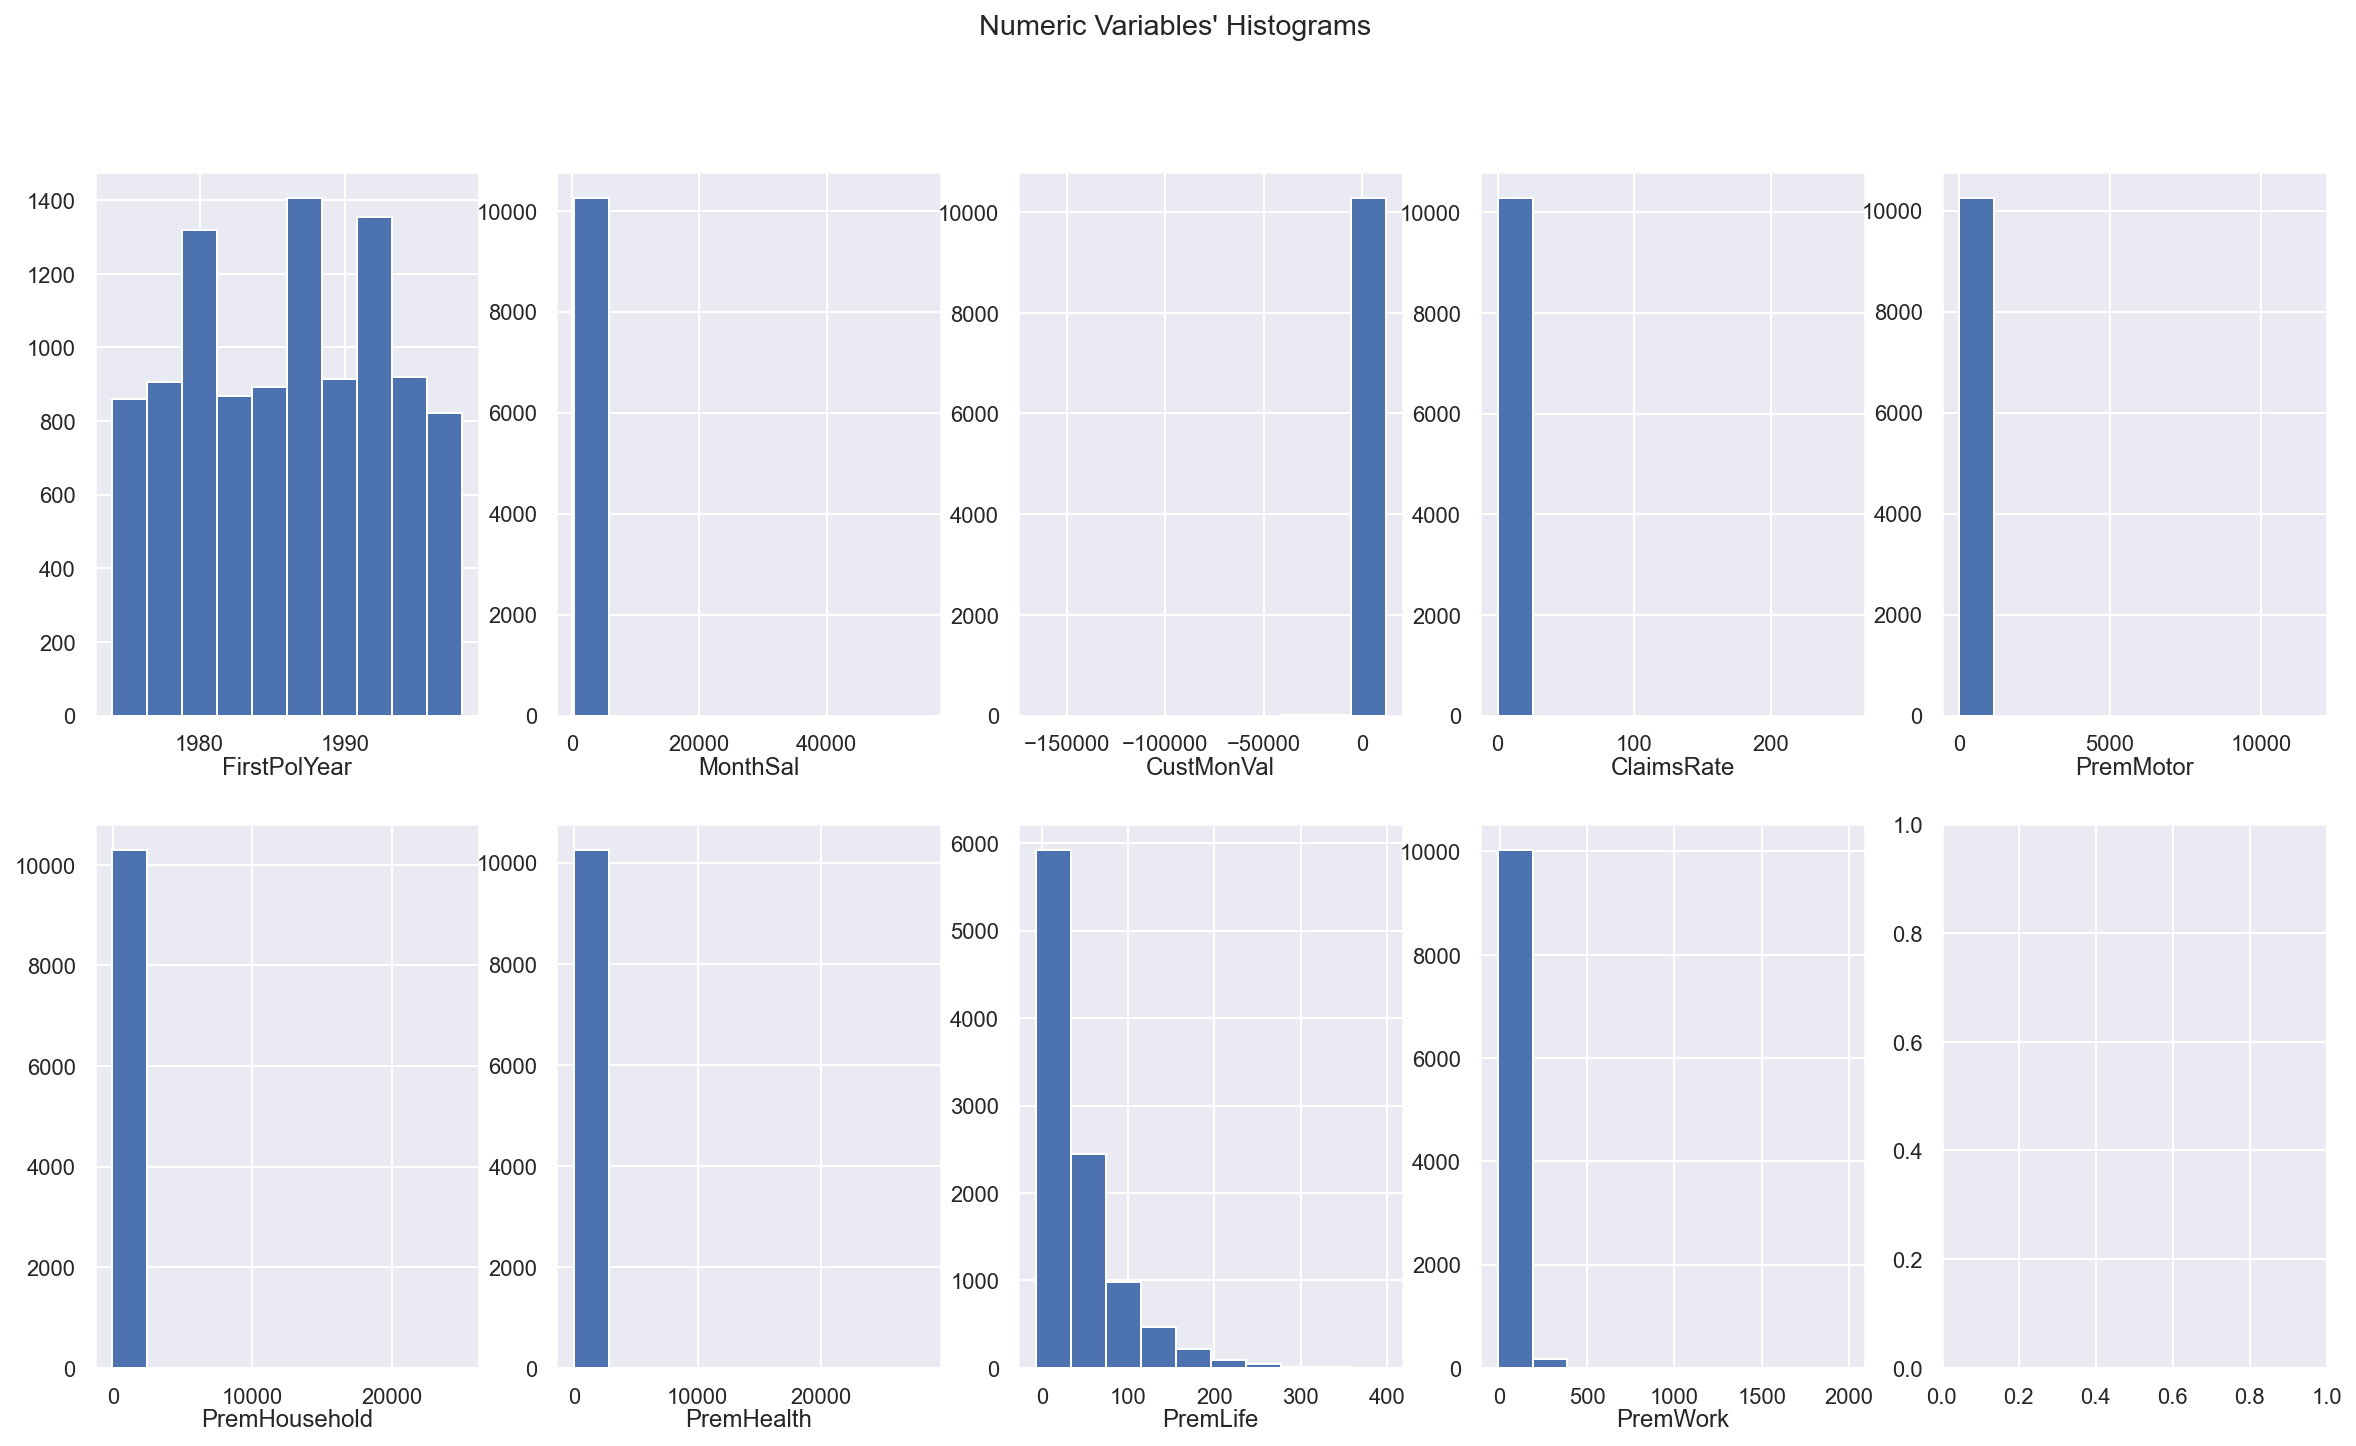

In [97]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data_consist[feat][~np.isnan(data_consist[feat])], bins=10)  
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

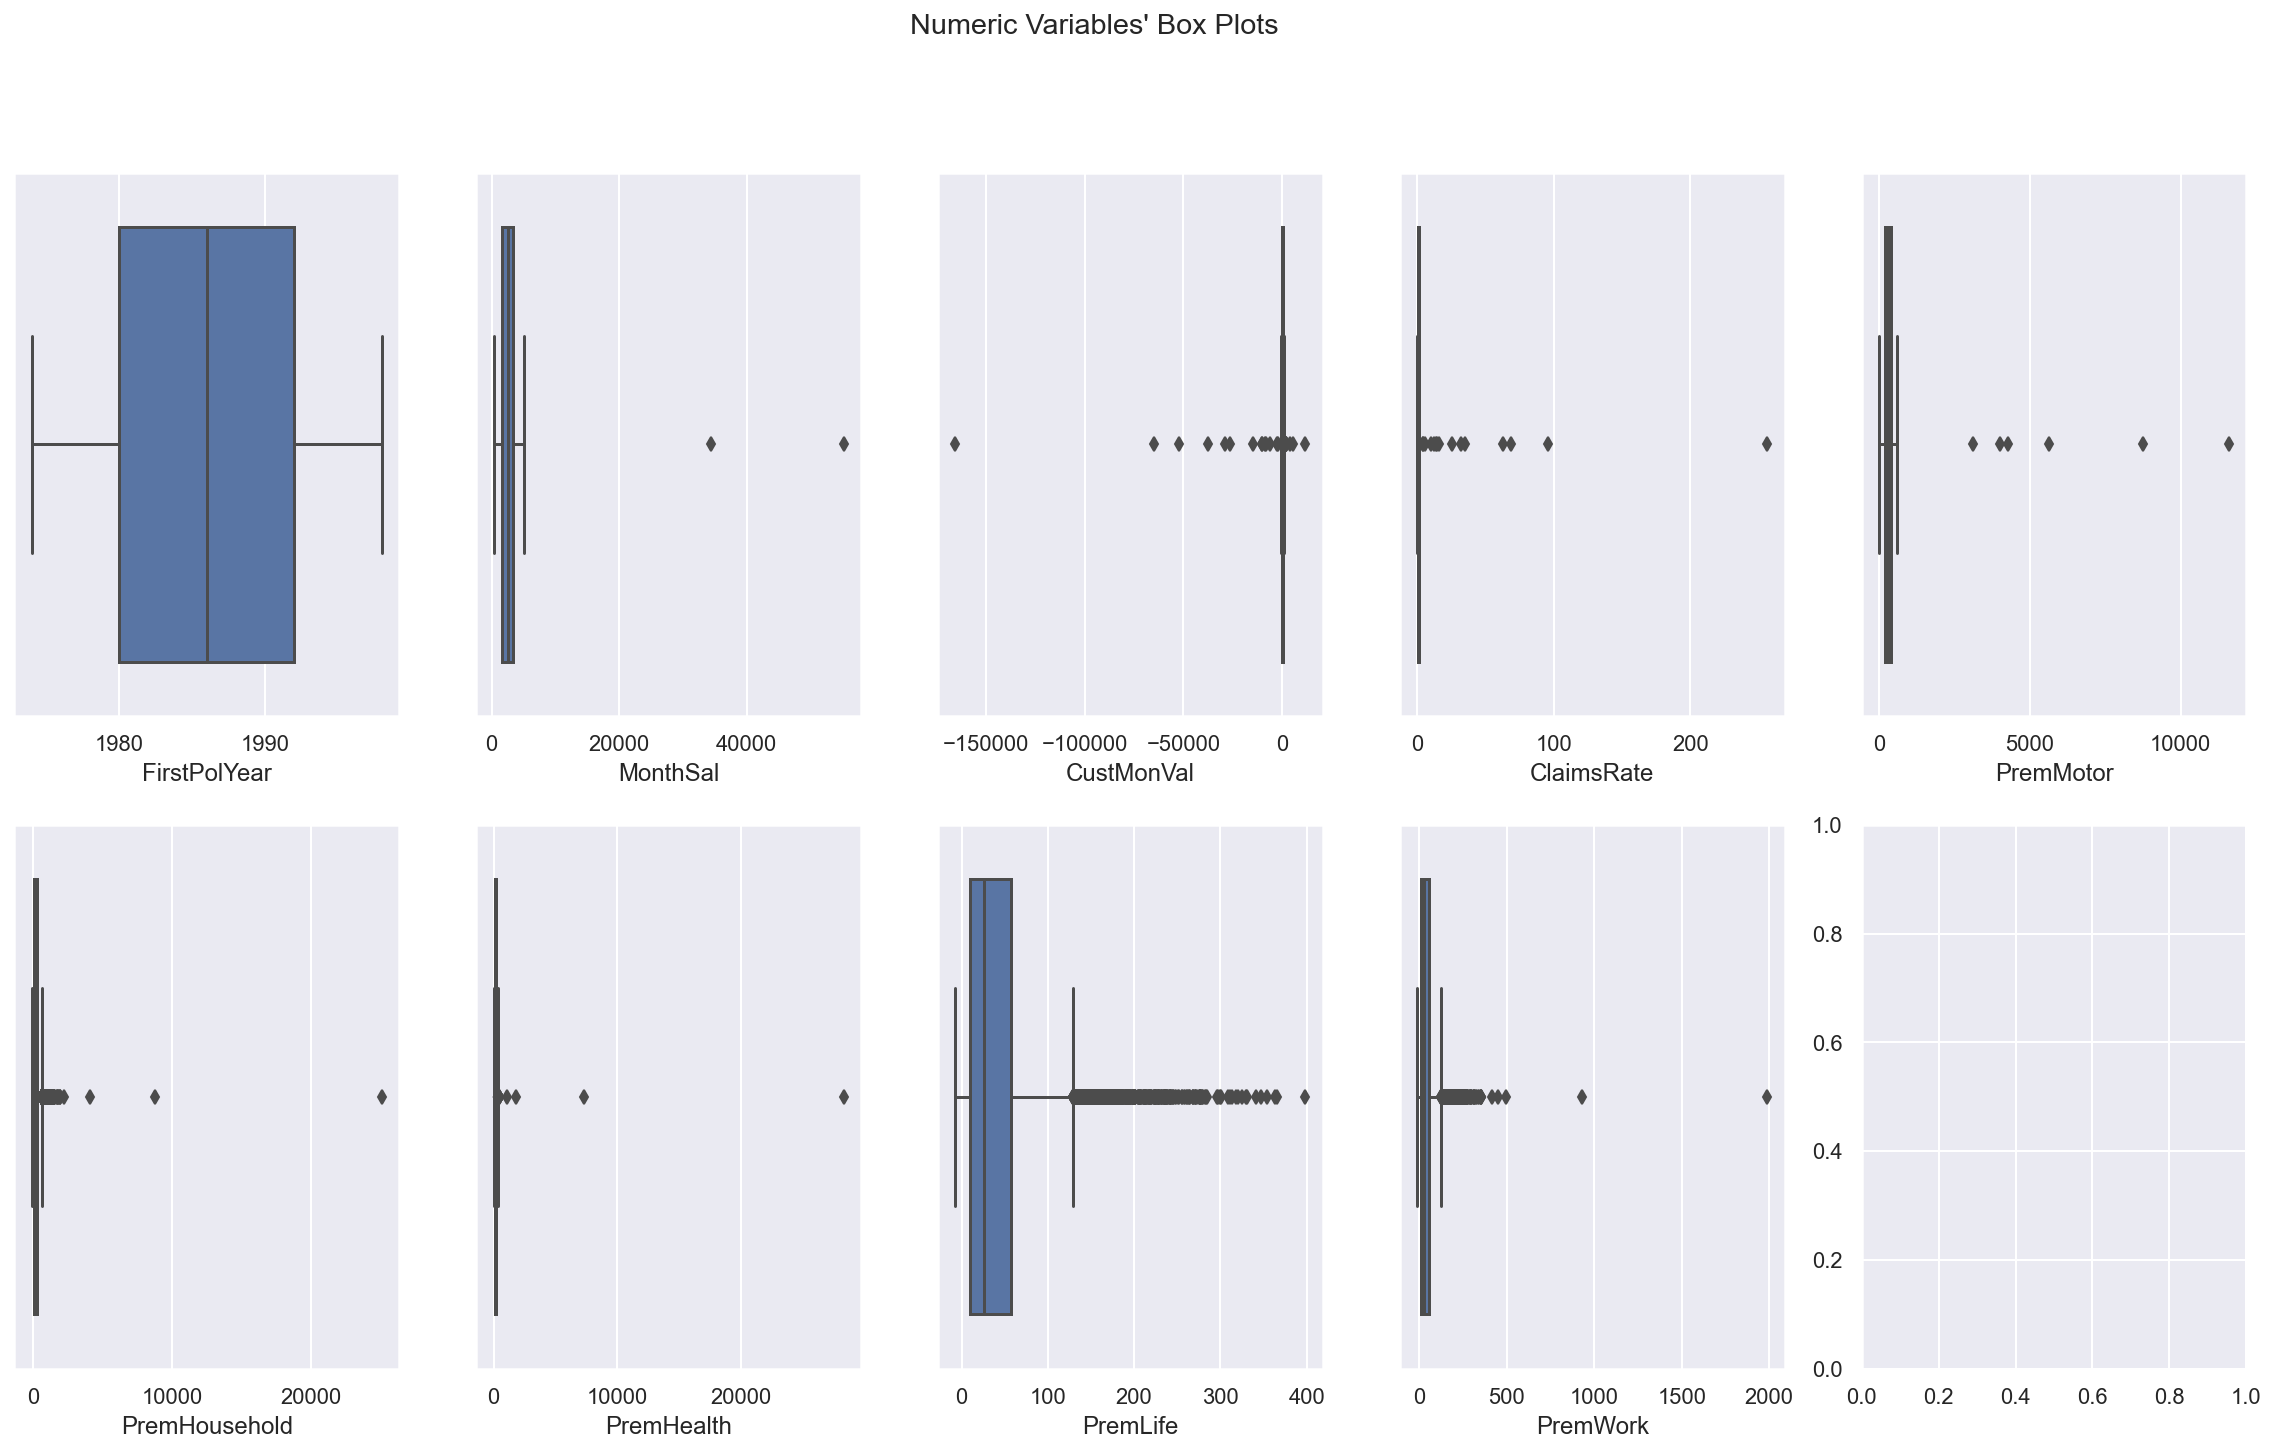

In [98]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_consist[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

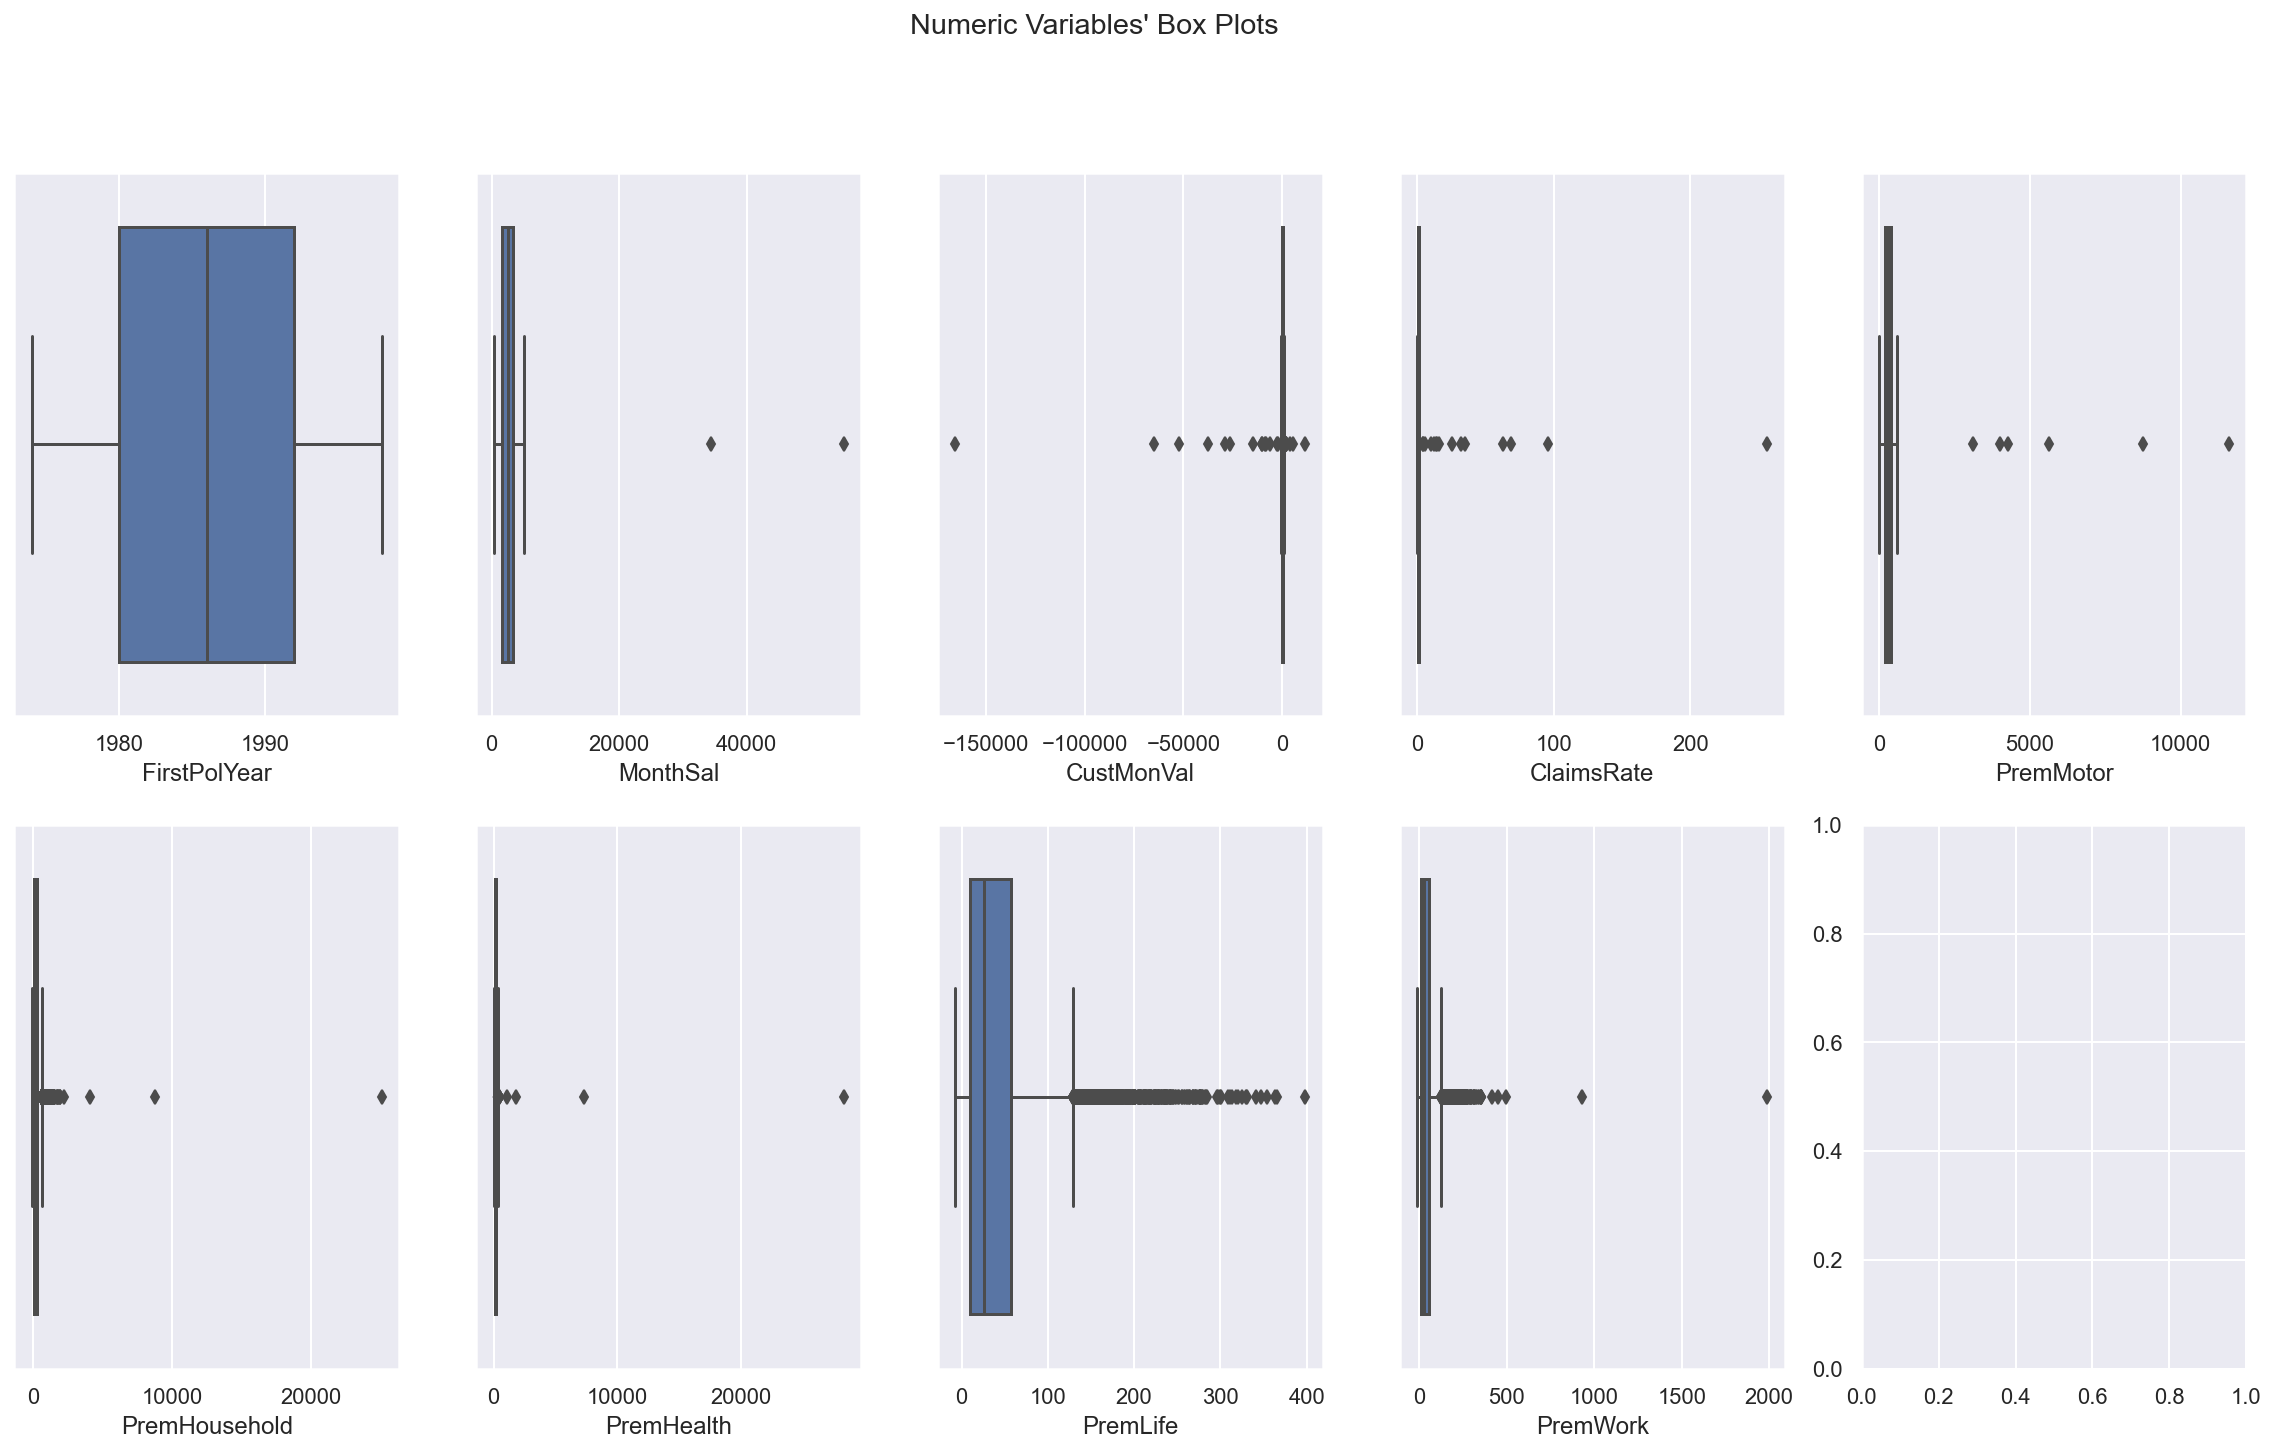

In [99]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_consist[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()


<a class="anchor" id="manual">

### Manual Filter
    
</a>

In [100]:

filters1 = (
    
    ((data_consist['MonthSal']<=10000) | (data_consist['MonthSal'].isnull()))
    &
#     ((data_consist['CustMonVal']>=-20000) | (data_consist['CustMonVal'].isnull()))
#     &
    ((data_consist['CustMonVal']>=-1250) | (data_consist['CustMonVal'].isnull()))
    &
    ((data_consist['CustMonVal']<1500) | (data_consist['CustMonVal'].isnull()))
    &
#     ((data_consist['ClaimsRate']<=50)| (data_consist['ClaimsRate'].isnull()))
#     &
    ((data_consist['ClaimsRate']<=4)| (data_consist['ClaimsRate'].isnull()))
    &
#     ((data_consist['PremMotor']<=25000)| (data_consist['PremMotor'].isnull()))
#     &
    ((data_consist['PremMotor']<=2000)| (data_consist['PremMotor'].isnull()))
    &
    ((data_consist['PremHousehold']<=1600)| (data_consist['PremHousehold'].isnull()))
    &
    ((data_consist['PremHealth']<=800)| (data_consist['PremHealth'].isnull()))
    &
    ((data_consist['PremLife']<=200)| (data_consist['PremLife'].isnull()))
    &
    ((data_consist['PremWork']<=400)| (data_consist['PremWork'].isnull()))   
    
)

data_1=data_consist[filters1]

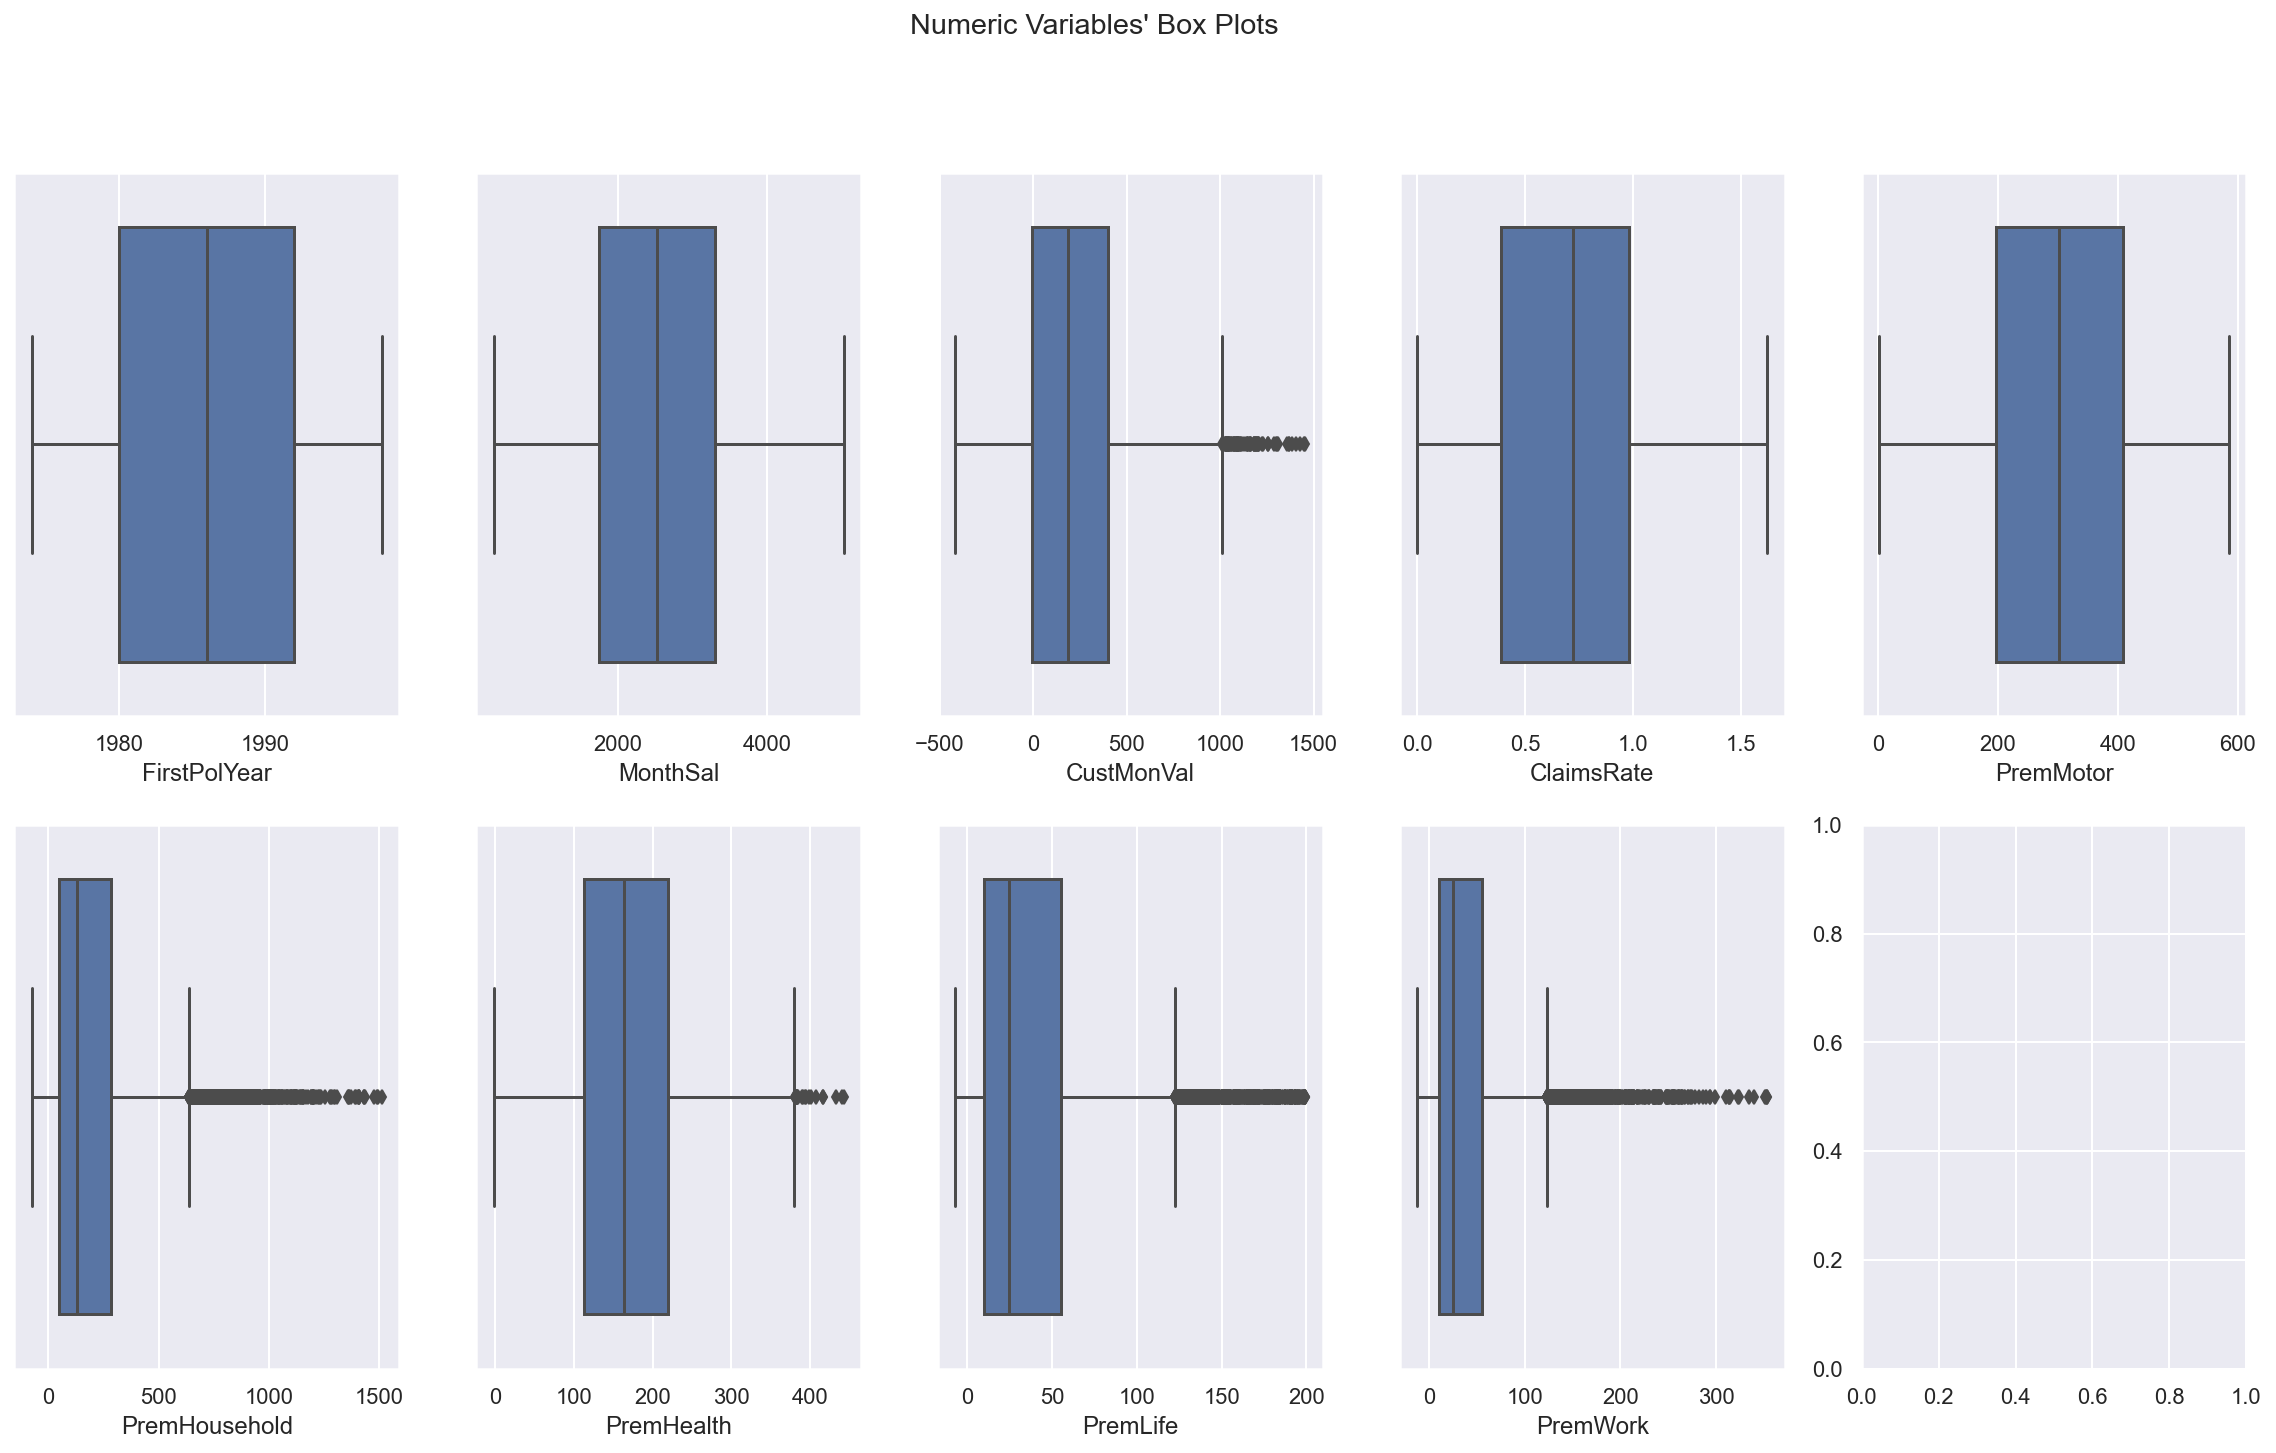

In [101]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_1[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

In [102]:
print('Percentage of outliers removed:', (1-np.round((data_1.shape[0] / data_consist.shape[0]), 4))*100)

Percentage of outliers removed: 1.880000000000004


Text(0.5, 0.98, "Numeric Variables' Histograms")

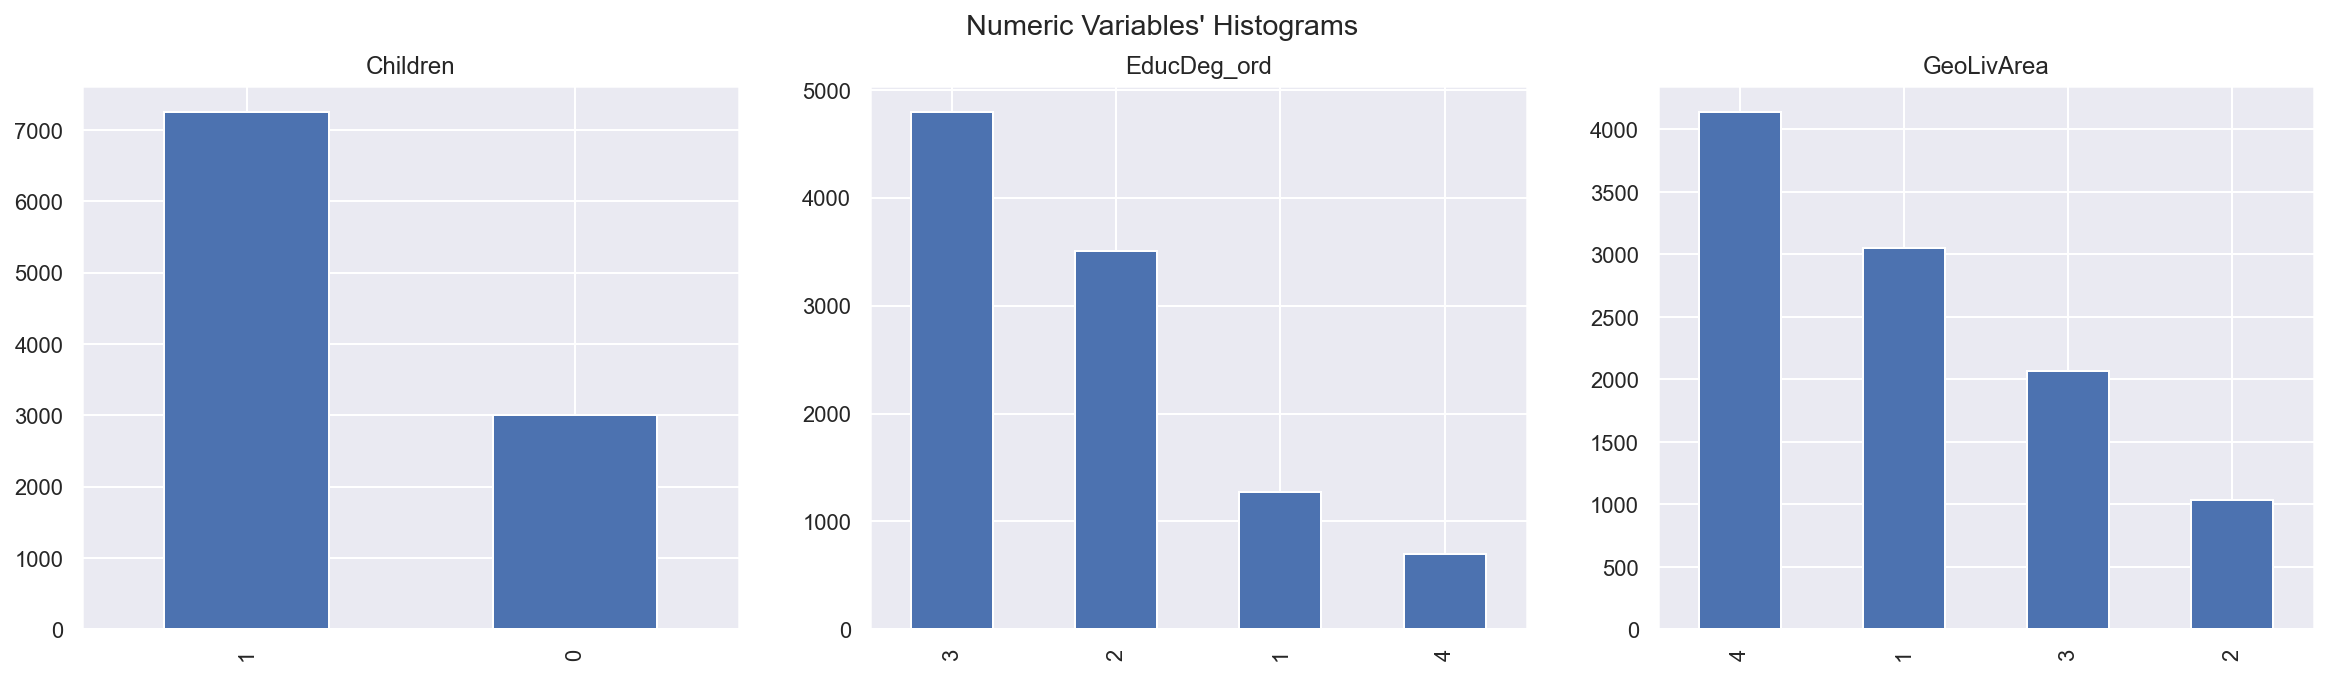

In [103]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, ax = plt.subplots(1, len(non_metric_features),figsize=(20, 5))

for i, categorical_feature in enumerate(data[non_metric_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

In [104]:
data_consist.isna().sum()

FirstPolYear      30
MonthSal          36
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

<a class="anchor" id="iqr">

### IQR Method
    
</a>

In [43]:
def drop_outliers_IQR(df, iqr_mult,  metric_features):
    filters2 = []
    
    for metric in metric_features:
    
        q25 = df[metric].quantile(.25)
        q75 = df[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + (iqr_mult * iqr)
        lower_lim = q25 - (iqr_mult * iqr)
        filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))

    filters2 = pd.Series(np.all(filters2, 0), index=df.index)
    data_2 = df[filters2]
   

    return data_2

In [44]:
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [45]:
drop_outliers_IQR(data_consist[metric_features][~np.isnan(data_consist['PremHousehold'])], 4 , ['PremHousehold'])

C:\Users\filip\AppData\Local\Temp/ipykernel_29080/1776084696.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))


FirstPolYear  MonthSal   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                                 
1.0              1985    2177.0   380.970001        0.39  375.850006   
2.0              1981     677.0  -131.130005        1.12   77.459999   
3.0              1991    2277.0   504.670013        0.28  206.149994   
4.0              1990    1099.0       -16.99        0.99  182.479996   
5.0              1986    1763.0        35.23         0.9  338.619995   
...               ...       ...          ...         ...         ...   
10292.0          1984    3188.0        -0.11        0.96   393.73999   
10293.0          1977    2431.0  1405.599976         0.0  133.580002   
10294.0          1994    2918.0   524.099976        0.21  403.630005   
10295.0          1981    1971.0   250.050003        0.65  188.589996   
10296.0          1990    2815.0       463.75        0.27  414.079987   

         PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                      
1.0          79.449997  146.360001   47.009998   16.889999  
2.0         416.200012  116.690002  194.479996  106.129997  
3.0              224.5  124.580002   86.349998   99.019997  
4.0          43.349998  311.170013       35.34       28.34  
5.0          47.799999  182.589996   18.780001   41.450001  
...                ...         ...         ...         ...  
10292.0      49.450001  173.809998        9.78       14.78  
10293.0        1035.75      143.25       12.89  105.129997  
10294.0     132.800003      142.25       12.67        4.89  
10295.0     211.149994  198.369995   63.900002  112.910004  
10296.0      94.449997      141.25        6.89       12.89  

[10255 rows x 9 columns]

In [105]:
outliers = data_consist[~filters1]

In [106]:
data_consist=data_consist[filters1]

In [107]:
data_consist

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  
CustID                           
1.0       47.009998   16.889999  
2.0      194.479996  106.129997  
3.0       86.349998   99.019997  
4.0           35.34       28.34  
5.0       18.780001   41.450001  
...             ...         ...  
10292.0        9.78       14.78  
10293.0       12.89  105.129997  
10294.0       12.67        4.89  
10295.0   63.900002  112.910004  
10296.0        6.89       12.89  

[10099 rows x 12 columns]

<a class="anchor" id="multi-outliers">

### Multi-dimentional outliers
    
</a>

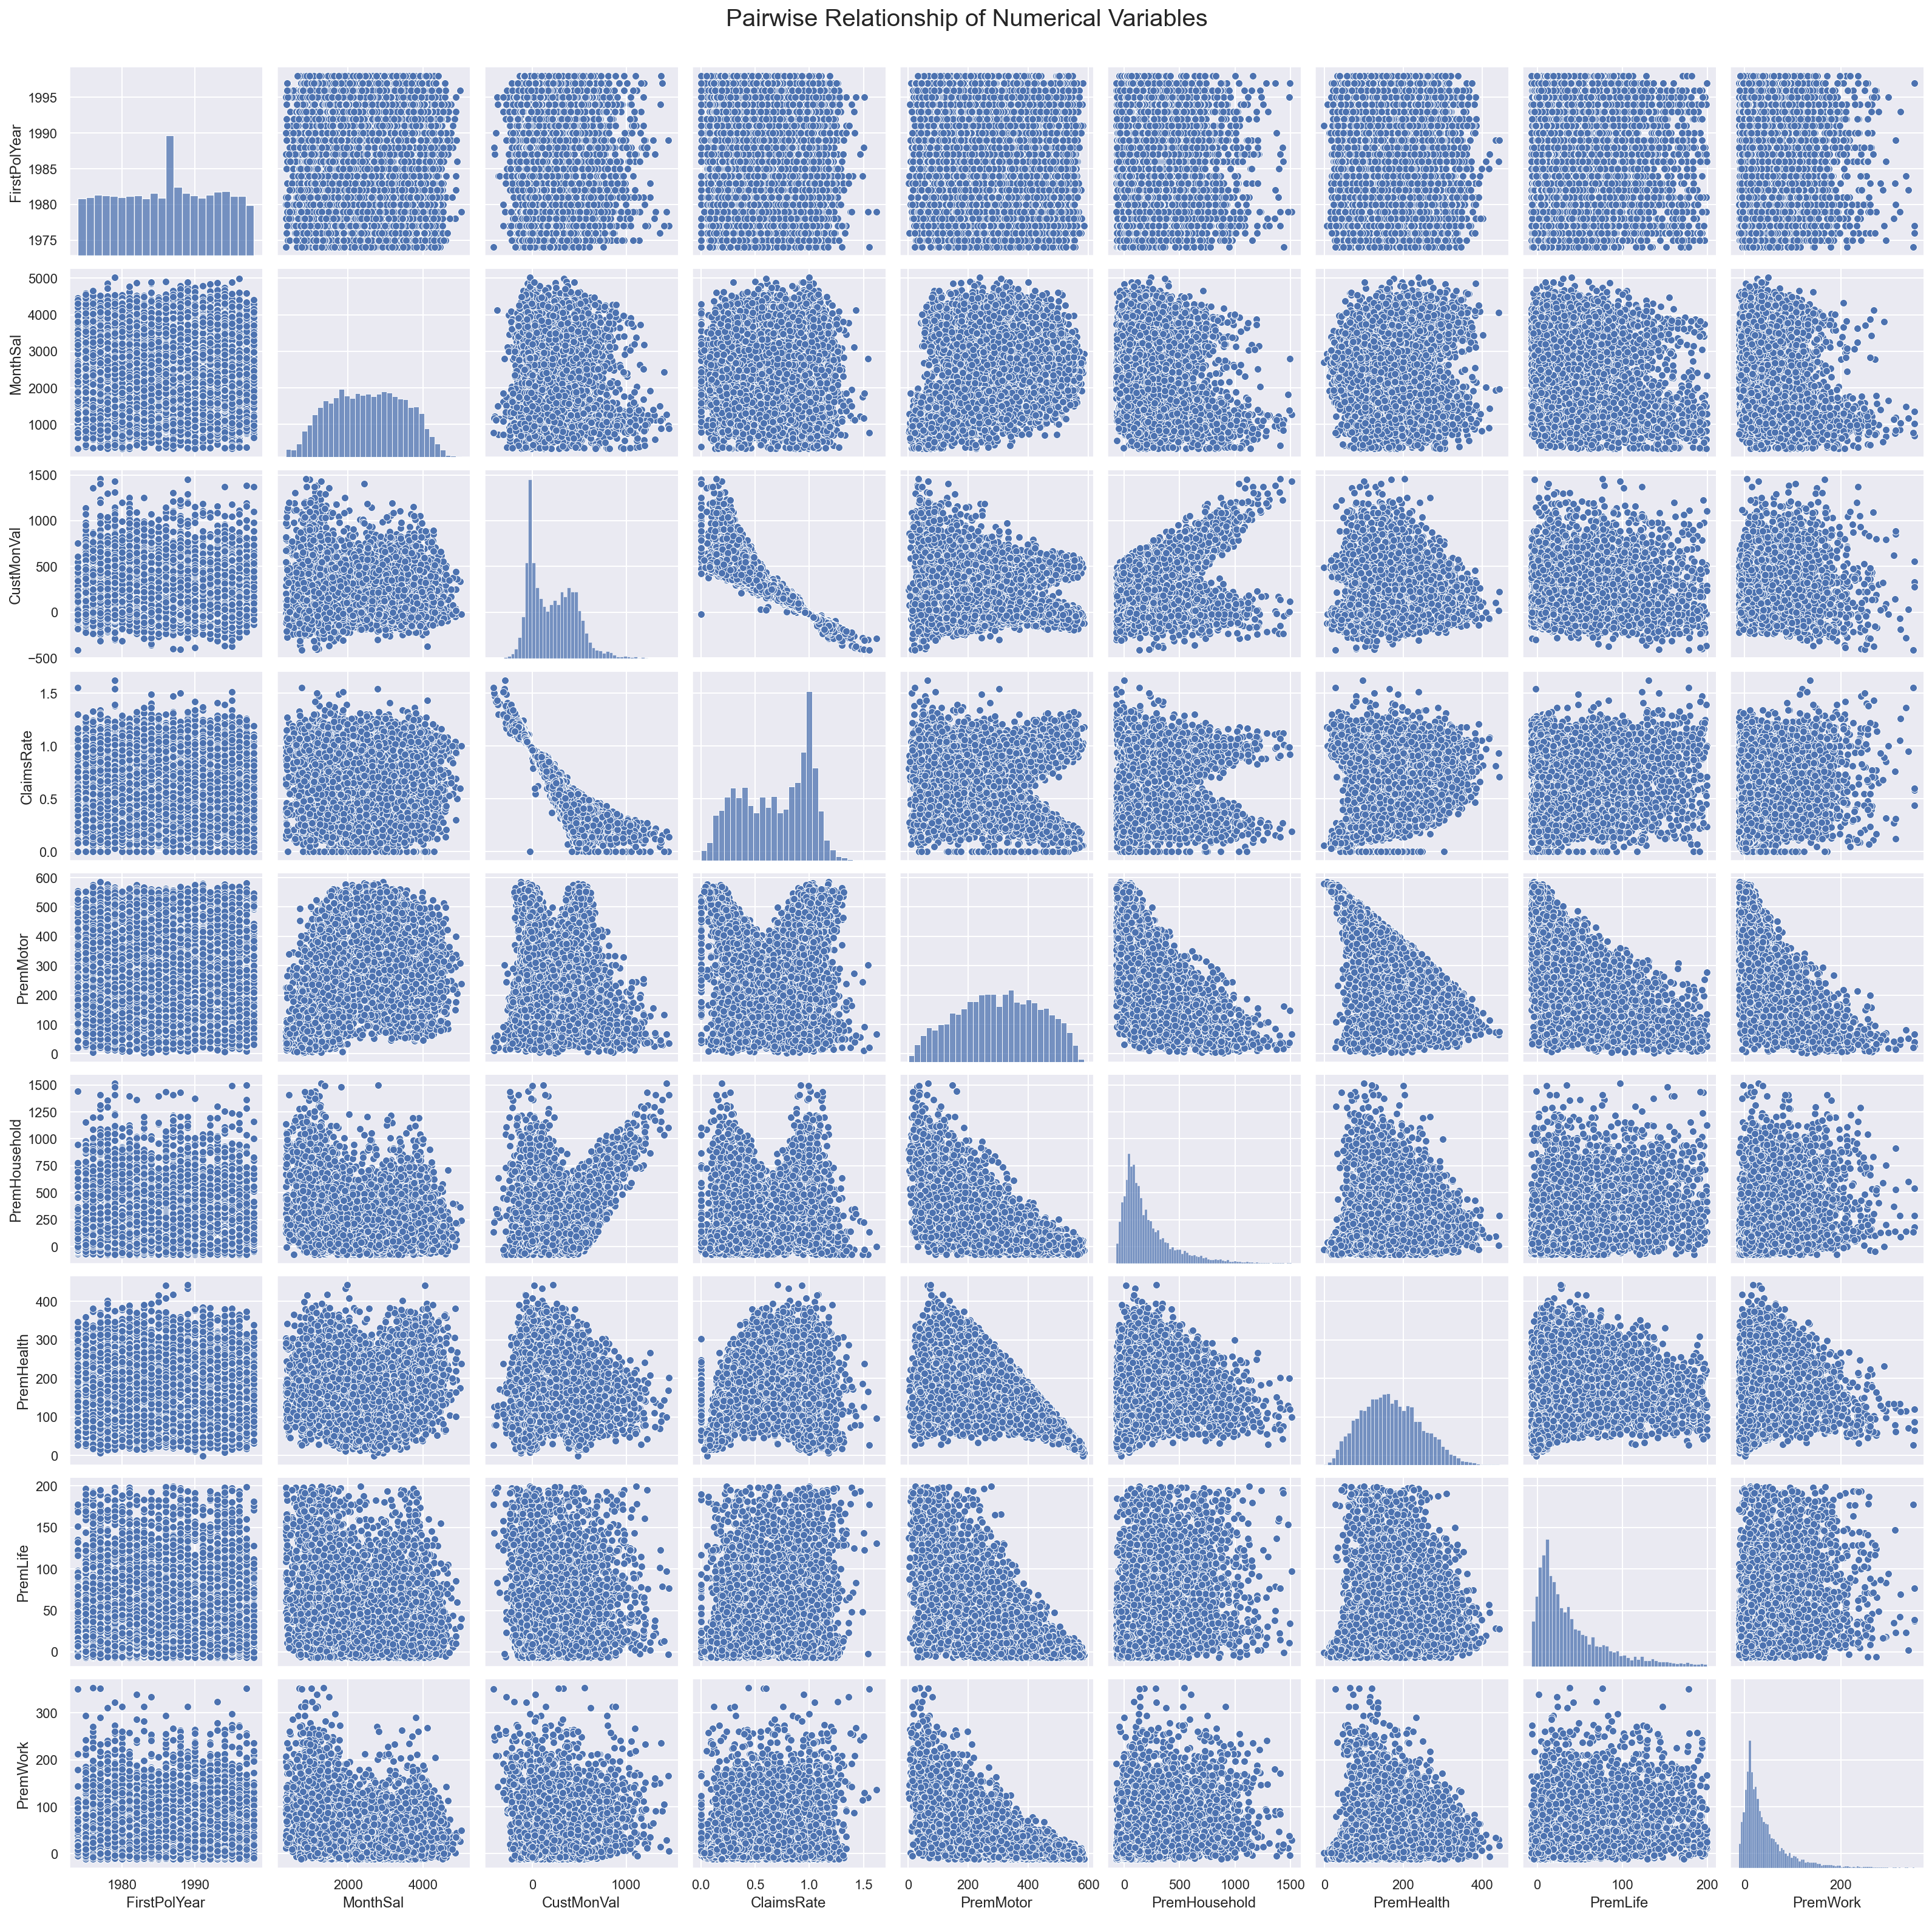

In [47]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data_consist[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

In [465]:
data_out_rmv=data_consist.copy()


<a class="anchor" id="scale1">

## Scale the data
    
</a>

In [466]:
# scale the data before the missing values imputation due to KNN

from sklearn.preprocessing import MinMaxScaler
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_out_rmv[metric_features])
scaled_feat

array([[0.45833333, 0.39334471, 0.42596936, ..., 0.33366296, 0.26171439,
        0.07911167],
       [0.29166667, 0.07337884, 0.15250953, ..., 0.26698431, 0.9763047 ,
        0.32348431],
       [0.70833333, 0.41467577, 0.49202478, ..., 0.28471584, 0.45234288,
        0.30401446],
       ...,
       [0.83333333, 0.55140785, 0.50240032, ..., 0.32442638, 0.09531424,
        0.04625116],
       [0.29166667, 0.34940273, 0.35605848, ..., 0.45054723, 0.3435577 ,
        0.34205051],
       [0.66666667, 0.52943686, 0.47017362, ..., 0.32217903, 0.0673063 ,
        0.06815817]])

In [467]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [ 1.97400000e+03  3.33000000e+02 -4.16730011e+02  0.00000000e+00
  1.77999997e+00 -7.50000000e+01 -2.10999990e+00 -7.00000000e+00
 -1.20000000e+01] 
 [1.99800000e+03 5.02100000e+03 1.45593994e+03 1.62000000e+00
 5.85219971e+02 1.51305005e+03 4.42859985e+02 1.99369995e+02
 3.53179993e+02]


In [468]:
data_out_rmv[metric_features] = scaled_feat
data_out_rmv.head()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
1.0         0.458333  0.393345            2           1         1    0.425969   
2.0         0.291667  0.073379            2           4         1    0.152510   
3.0         0.708333  0.414676            1           3         0    0.492025   
4.0         0.666667  0.163396            3           4         1    0.213460   
5.0         0.500000  0.305034            3           4         1    0.241345   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
CustID                                                                        
1.0       0.240741   0.641146       0.097258    0.333663  0.261714  0.079112  
2.0       0.691358   0.129713       0.309310    0.266984  0.976305  0.323484  
3.0       0.172840   0.350285       0.188596    0.284716  0.452343  0.304014  
4.0       0.611111   0.309715       0.074525    0.704048  0.205165  0.110466  
5.0       0.555556   0.577334       0.077328    0.415084  0.124921  0.146366

In [469]:
# Checking max and min of minmaxed variables
data_out_rmv[metric_features].describe().round(2).T

count  mean   std  min   25%   50%   75%  max
FirstPolYear   10069.0  0.50  0.28  0.0  0.25  0.50  0.75  1.0
MonthSal       10063.0  0.47  0.21  0.0  0.30  0.47  0.63  1.0
CustMonVal     10099.0  0.34  0.14  0.0  0.22  0.32  0.44  1.0
ClaimsRate     10099.0  0.42  0.20  0.0  0.24  0.44  0.60  1.0
PremMotor      10066.0  0.51  0.23  0.0  0.34  0.52  0.70  1.0
PremHousehold  10099.0  0.17  0.14  0.0  0.08  0.13  0.23  1.0
PremHealth     10057.0  0.38  0.17  0.0  0.26  0.37  0.50  1.0
PremLife        9995.0  0.22  0.20  0.0  0.08  0.15  0.30  1.0
PremWork       10013.0  0.14  0.13  0.0  0.06  0.10  0.19  1.0

<a class="anchor" id="missings">

## Missing Values
    
</a>

In [470]:
# Checking maximum number of nan in a record
maxi=0
ind_max=[]
for i in data_out_rmv.index:
    if data_out_rmv.loc[i,:].isna().sum()>maxi:
        maxi=data_out_rmv.loc[i,:].isna().sum()
for i in data_out_rmv.index:
    if data_out_rmv.loc[i,:].isna().sum()==maxi:
        ind_max.append(i)
print(maxi,ind_max)

#decided not to drop the record since there are many more features.

4 [863.0, 1134.0, 3166.0, 4023.0, 4114.0, 4272.0, 5984.0, 6440.0, 6615.0, 8586.0, 9399.0, 9789.0]


In [471]:
check_nan_feature=pd.DataFrame(data_out_rmv.isna().sum()).rename(columns={0:'Nr_missings'})
#check_nan_feature.columns.values[0]="Nr_missings"
print(check_nan_feature)
check_nan_feature['perc']=check_nan_feature['Nr_missings']/len(data_out_rmv) *100

               Nr_missings
FirstPolYear            30
MonthSal                36
EducDeg_ord             17
GeoLivArea               1
Children                21
CustMonVal               0
ClaimsRate               0
PremMotor               33
PremHousehold            0
PremHealth              42
PremLife               104
PremWork                86


In [472]:
check_nan_feature
# there is no feature with more than 20% of nan values-- no feature will be removed

Nr_missings      perc
FirstPolYear            30  0.297059
MonthSal                36  0.356471
EducDeg_ord             17  0.168333
GeoLivArea               1  0.009902
Children                21  0.207941
CustMonVal               0  0.000000
ClaimsRate               0  0.000000
PremMotor               33  0.326765
PremHousehold            0  0.000000
PremHealth              42  0.415883
PremLife               104  1.029805
PremWork                86  0.851569

### Premiums missings treatment

In [473]:
# Filled nan values in insurance expenses with 0
data_out_rmv['PremMotor'].fillna(0, inplace = True)
data_out_rmv['PremHealth'].fillna(0, inplace = True)
data_out_rmv['PremLife'].fillna(0, inplace = True)
data_out_rmv['PremWork'].fillna(0, inplace = True)

<a class="anchor" id="mode_missing">

## Mode
    
</a>

### GeoLivArea missings treatment

In [474]:
data_out_rmv['GeoLivArea'].value_counts()

4    4058
1    2999
3    2022
2    1019
Name: GeoLivArea, dtype: Int64

In [475]:
mode_geo = data['GeoLivArea'].mode().loc[0]
data_out_rmv['GeoLivArea'].fillna(mode_geo, inplace=True)

In [476]:
data_out_rmv.isna().sum()

FirstPolYear     30
MonthSal         36
EducDeg_ord      17
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [477]:
#data_out_rmv=data_out_rmv[~((data_out_rmv['FirstPolYear'].isna()) & (data_out_rmv['BirthYear'].isna()))]

<a class="anchor" id="KNN_missing">

## KNN
    
</a>

### MonthSal and FirstPolYear missings treatment - KNNImputer

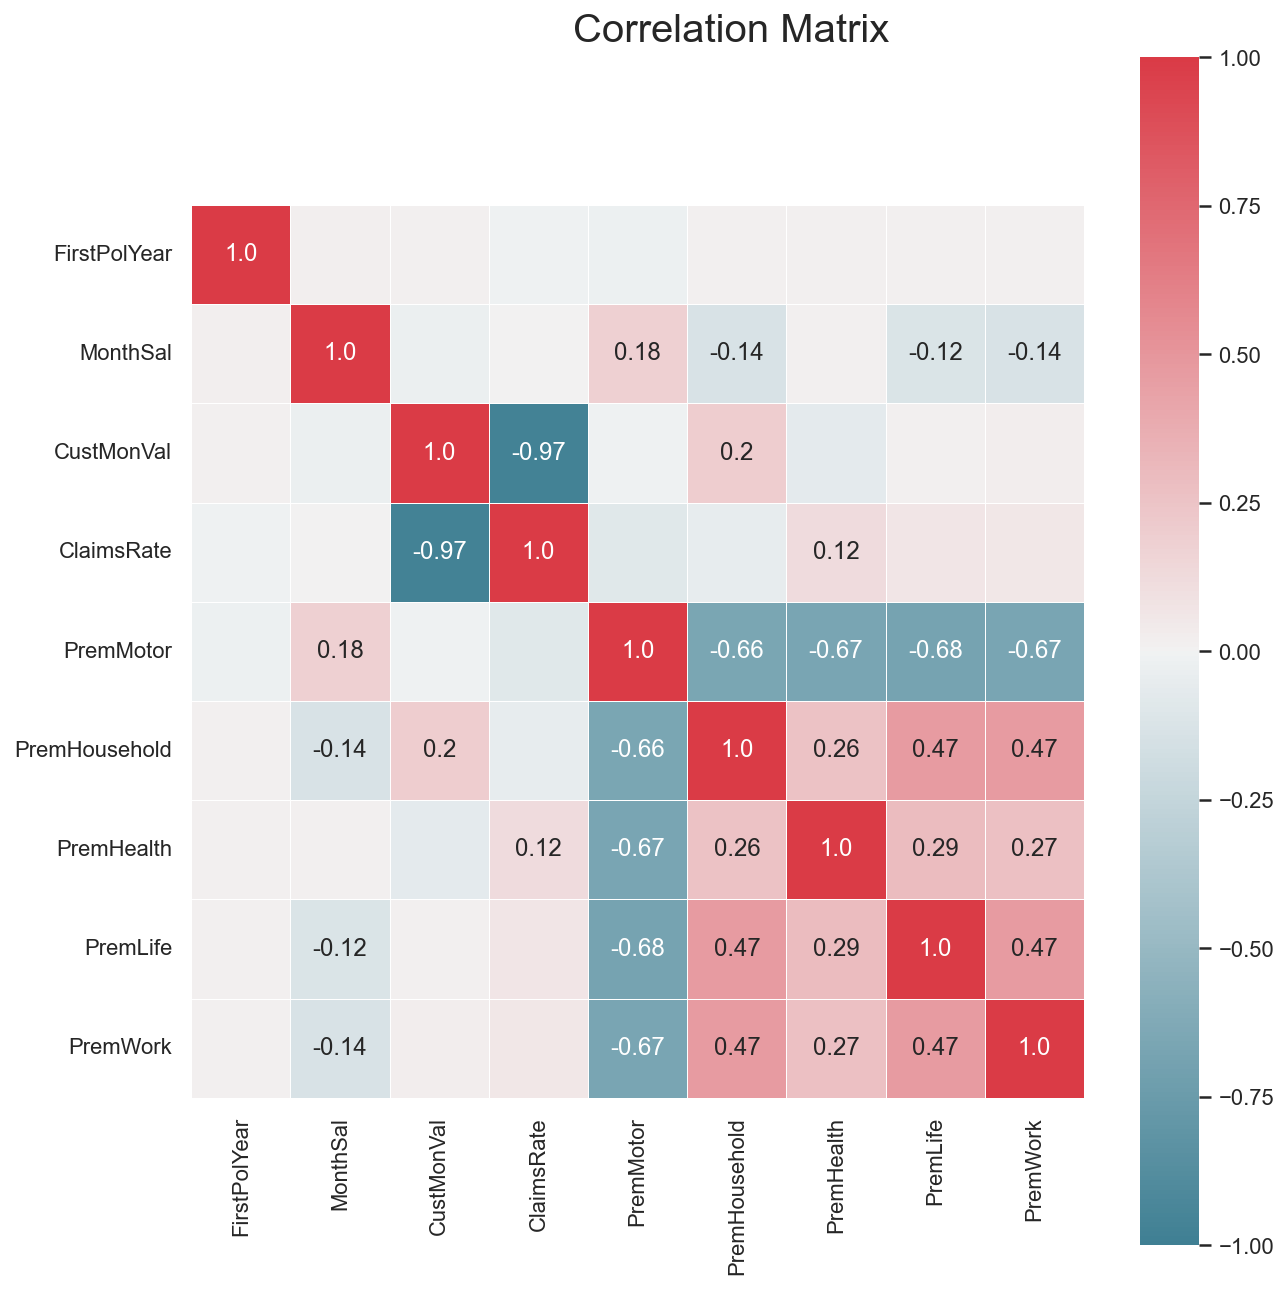

In [478]:
# Prepare figure
fig = plt.figure(figsize=(10, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(data_out_rmv[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.1
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [479]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score,precision_score,f1_score
from sklearn import metrics

In [483]:
# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=5, weights="distance")
prem_list=['PremMotor','PremHousehold','PremLife','PremWork','MonthSal','FirstPolYear']
data_out_rmv[prem_list]=imputer.fit_transform(data_out_rmv[prem_list])

In [484]:
data_out_rmv.isna().sum()

FirstPolYear      0
MonthSal          0
EducDeg_ord      17
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

### EducDeg_ord missings treatment - KNNClassifier

In [485]:
data_out_rmv['EducDeg_ord'].value_counts()

3    4776
2    3445
1    1165
4     696
Name: EducDeg_ord, dtype: Int64

In [486]:
from sklearn.neighbors import KNeighborsClassifier


In [490]:
missings_educ = data_out_rmv[data_out_rmv['EducDeg_ord'].isna()].drop(['EducDeg_ord','Children'], axis=1)
input_data_educ = data_out_rmv[~data_out_rmv[['EducDeg_ord','Children']].isna()]

X_knn_educ = input_data_educ.drop(['EducDeg_ord','Children'], axis=1)
y_knn_educ = input_data_educ['EducDeg_ord']
y_knn_educ = y_knn_educ.astype('int')

ValueError: cannot convert to 'int32'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [489]:
from sklearn.model_selection import train_test_split
X_train_knn_educ, X_val_knn_educ, y_train_knn_educ, y_val_knn_educ = train_test_split(X_knn_educ, y_knn_educ, train_size=0.7, stratify = y_knn_educ, random_state=5)

AttributeError: 'bool' object has no attribute 'any'

In [73]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X = X_train_knn_educ, y = y_train_knn_educ)

NameError: name 'X_train_knn_educ' is not defined

In [74]:
labels_train = modelKNN.predict(X_train_knn_educ)
labels_val = modelKNN.predict(X_val_knn_educ)
labels_val

NameError: name 'X_train_knn_educ' is not defined

In [75]:
print(modelKNN.score(X_train_knn_educ, y_train_knn_educ))
print(modelKNN.score(X_val_knn_educ, y_val_knn_educ))

NameError: name 'X_train_knn_educ' is not defined

In [76]:
modelKNN.kneighbors(X = X_val)

NameError: name 'X_val' is not defined

<a class="anchor" id="logistic_missing">

## Logistic Regression
    
</a>

### Children missings treatment

In [493]:
# JUST TO TEST
data_out_rmv['EducDeg_ord'].fillna(0, inplace = True)

In [494]:
input_data=data_out_rmv.copy()

In [495]:
input_data.isna().sum()

FirstPolYear      0
MonthSal          0
EducDeg_ord       0
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [500]:
missings_children= input_data[input_data['Children'].isna()].drop('Children', axis=1)
input_data_log=input_data[~input_data['Children'].isna()]
X_input_data_log=input_data_log.drop('Children', axis=1)
y_log=pd.DataFrame(input_data_log['Children'])
y_log=y_log.astype('int')


X_train_log, X_val_log,y_train_log,y_val_log = train_test_split(X_input_data_log,y_log,test_size=0.3,random_state=5, stratify=y_log)

lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [501]:
y_pred_val_log = lr.predict(X_val_log)


In [502]:
y_pred_train_log = lr.predict(X_train_log)

# no overfitting -- f1 score from validation is similar with f1 score for train

In [498]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [506]:
from sklearn.metrics import classification_report
metrics(y_train_log,y_pred_train_log,y_val_log,y_pred_val)
# no overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      2059
           1       0.86      0.93      0.89      4995

    accuracy                           0.84      7054
   macro avg       0.82      0.78      0.79      7054
weighted avg       0.84      0.84      0.83      7054

[[1298  761]
 [ 367 4628]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [509]:
imputed_children= lr.predict(missings_children)
imputed_children

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [510]:
missings_children['Children']=imputed_children

In [511]:
data_out_rmv=pd.concat([data_out_rmv,missings_children])

In [512]:
data_out_miss=data_out_rmv.copy()


<a class="anchor" id="12th-bullet">

### 2.4. Feature Engineering
    
</a>




In [513]:
##### criar variavel no inicio - current_year=2016
#data_out_miss['age']=2016-data_out_miss['BirthYear']

In [514]:
data_out_miss['year_cust']=2016-data_out_miss['FirstPolYear']

In [515]:
data_out_miss['Total_Premiums']=data_out_miss.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']][data_out_miss>0].sum(1)
#remove Total_Premiums==0

In [516]:
data_out_miss['annual_profit']=data_out_miss['CustMonVal']/data_out_miss['year_cust']

In [517]:
## using ln
data_out_miss['log_monthSal']=np.log10(data_out_miss['MonthSal'])

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [518]:
# ver numeros negativos em PREM

data_out_miss['log_cusMon']=np.log10(data_out_miss['CustMonVal']-np.max(data_out_miss['CustMonVal']+1))
data_out_miss['log_claims']=np.log10(data_out_miss['ClaimsRate'])
data_out_miss['log_health']=np.log10(data_out_miss['PremHealth'])
data_out_miss['log_household']=np.log10(data_out_miss['PremHousehold']-np.max(data_out_miss['PremHousehold']+1))
data_out_miss['log_life']=np.log10(data_out_miss['PremLife']-np.max(data_out_miss['PremLife']+1))
data_out_miss['log_motor']=np.log10(data_out_miss['PremMotor'])
data_out_miss['log_work']=np.log10(data_out_miss['PremWork']-np.max(data_out_miss['PremWork']+1))

data_out_miss['AnnualSal']=data_out_miss['MonthSal']*12

data_out_miss['perc_inc_health']=data_out_miss['PremHealth']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_household']=data_out_miss['PremHousehold']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_life']=data_out_miss['PremLife']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_motor']=data_out_miss['PremMotor']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_work']=data_out_miss['PremWork']/data_out_miss['AnnualSal']




C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [519]:
data_out_miss.describe().T

count         mean       std          min          25%  \
FirstPolYear        10120.0     0.500906  0.275444     0.000000     0.250000   
MonthSal            10120.0     0.465800  0.207665     0.000000     0.300501   
EducDeg_ord         10120.0     2.491798  0.793124     0.000000     2.000000   
GeoLivArea          10120.0     2.705830  1.266038     1.000000     1.000000   
Children            10099.0     0.708486  0.454482     0.000000     0.000000   
CustMonVal          10120.0     0.338236  0.135094     0.000000     0.217609   
ClaimsRate          10120.0     0.419499  0.196473     0.000000     0.240741   
PremMotor           10120.0     0.510927  0.234252     0.000000     0.333333   
PremHousehold       10120.0     0.174453  0.143605     0.000000     0.078020   
PremHealth          10120.0     0.382130  0.168296     0.000000     0.256242   
PremLife            10120.0     0.219428  0.196157     0.000000     0.081310   
PremWork            10120.0     0.142105  0.125999     0.000000     0.059943   
year_cust           10120.0  2015.499094  0.275444  2015.000000  2015.250000   
Total_Premiums      10120.0     1.429042  0.216849     0.047228     1.271912   
annual_profit       10120.0     0.000168  0.000067     0.000000     0.000108   
log_monthSal        10120.0         -inf       NaN         -inf    -0.522154   
log_cusMon              0.0          NaN       NaN          NaN          NaN   
log_claims          10120.0         -inf       NaN         -inf    -0.618450   
log_health          10120.0         -inf       NaN         -inf    -0.591350   
log_household           0.0          NaN       NaN          NaN          NaN   
log_life                0.0          NaN       NaN          NaN          NaN   
log_motor           10120.0         -inf       NaN         -inf    -0.477121   
log_work                0.0          NaN       NaN          NaN          NaN   
AnnualSal           10120.0     5.589599  2.491984     0.000000     3.606015   
perc_inc_health     10120.0          inf       NaN     0.000000     0.041671   
perc_inc_household  10120.0          inf       NaN     0.000000     0.013054   
perc_inc_life       10120.0          inf       NaN     0.000000     0.013489   
perc_inc_motor      10120.0          inf       NaN     0.000000     0.058492   
perc_inc_work       10120.0          inf       NaN     0.000000     0.009960   

                            50%          75%           max  
FirstPolYear           0.500000     0.750000  1.000000e+00  
MonthSal               0.467150     0.631826  1.000000e+00  
EducDeg_ord            3.000000     3.000000  4.000000e+00  
GeoLivArea             3.000000     4.000000  4.000000e+00  
Children               1.000000     1.000000  1.000000e+00  
CustMonVal             0.322409     0.435165  1.000000e+00  
ClaimsRate             0.444444     0.604938  1.000000e+00  
PremMotor              0.514860     0.698478  1.000000e+00  
PremHousehold          0.130160     0.226378  1.000000e+00  
PremHealth             0.371126     0.499000  1.000000e+00  
PremLife               0.152929     0.299947  1.000000e+00  
PremWork               0.102251     0.183499  1.000000e+00  
year_cust           2015.500000  2015.750000  2.016000e+03  
Total_Premiums         1.396479     1.552689  2.200602e+00  
annual_profit          0.000160     0.000216  4.960625e-04  
log_monthSal          -0.330543    -0.199403  0.000000e+00  
log_cusMon                  NaN          NaN           NaN  
log_claims            -0.352183    -0.218289 -4.821637e-17  
log_health            -0.430478    -0.301900  0.000000e+00  
log_household               NaN          NaN           NaN  
log_life                    NaN          NaN           NaN  
log_motor             -0.288311    -0.155847 -4.821637e-17  
log_work                    NaN          NaN           NaN  
AnnualSal              5.605802     7.581911  1.200000e+01  
perc_inc_health        0.064090     0.113560           inf  
perc_inc_household     0.022946    


<a class="anchor" id="13th-bullet">

### 2.6 Feature Selection
    
</a>


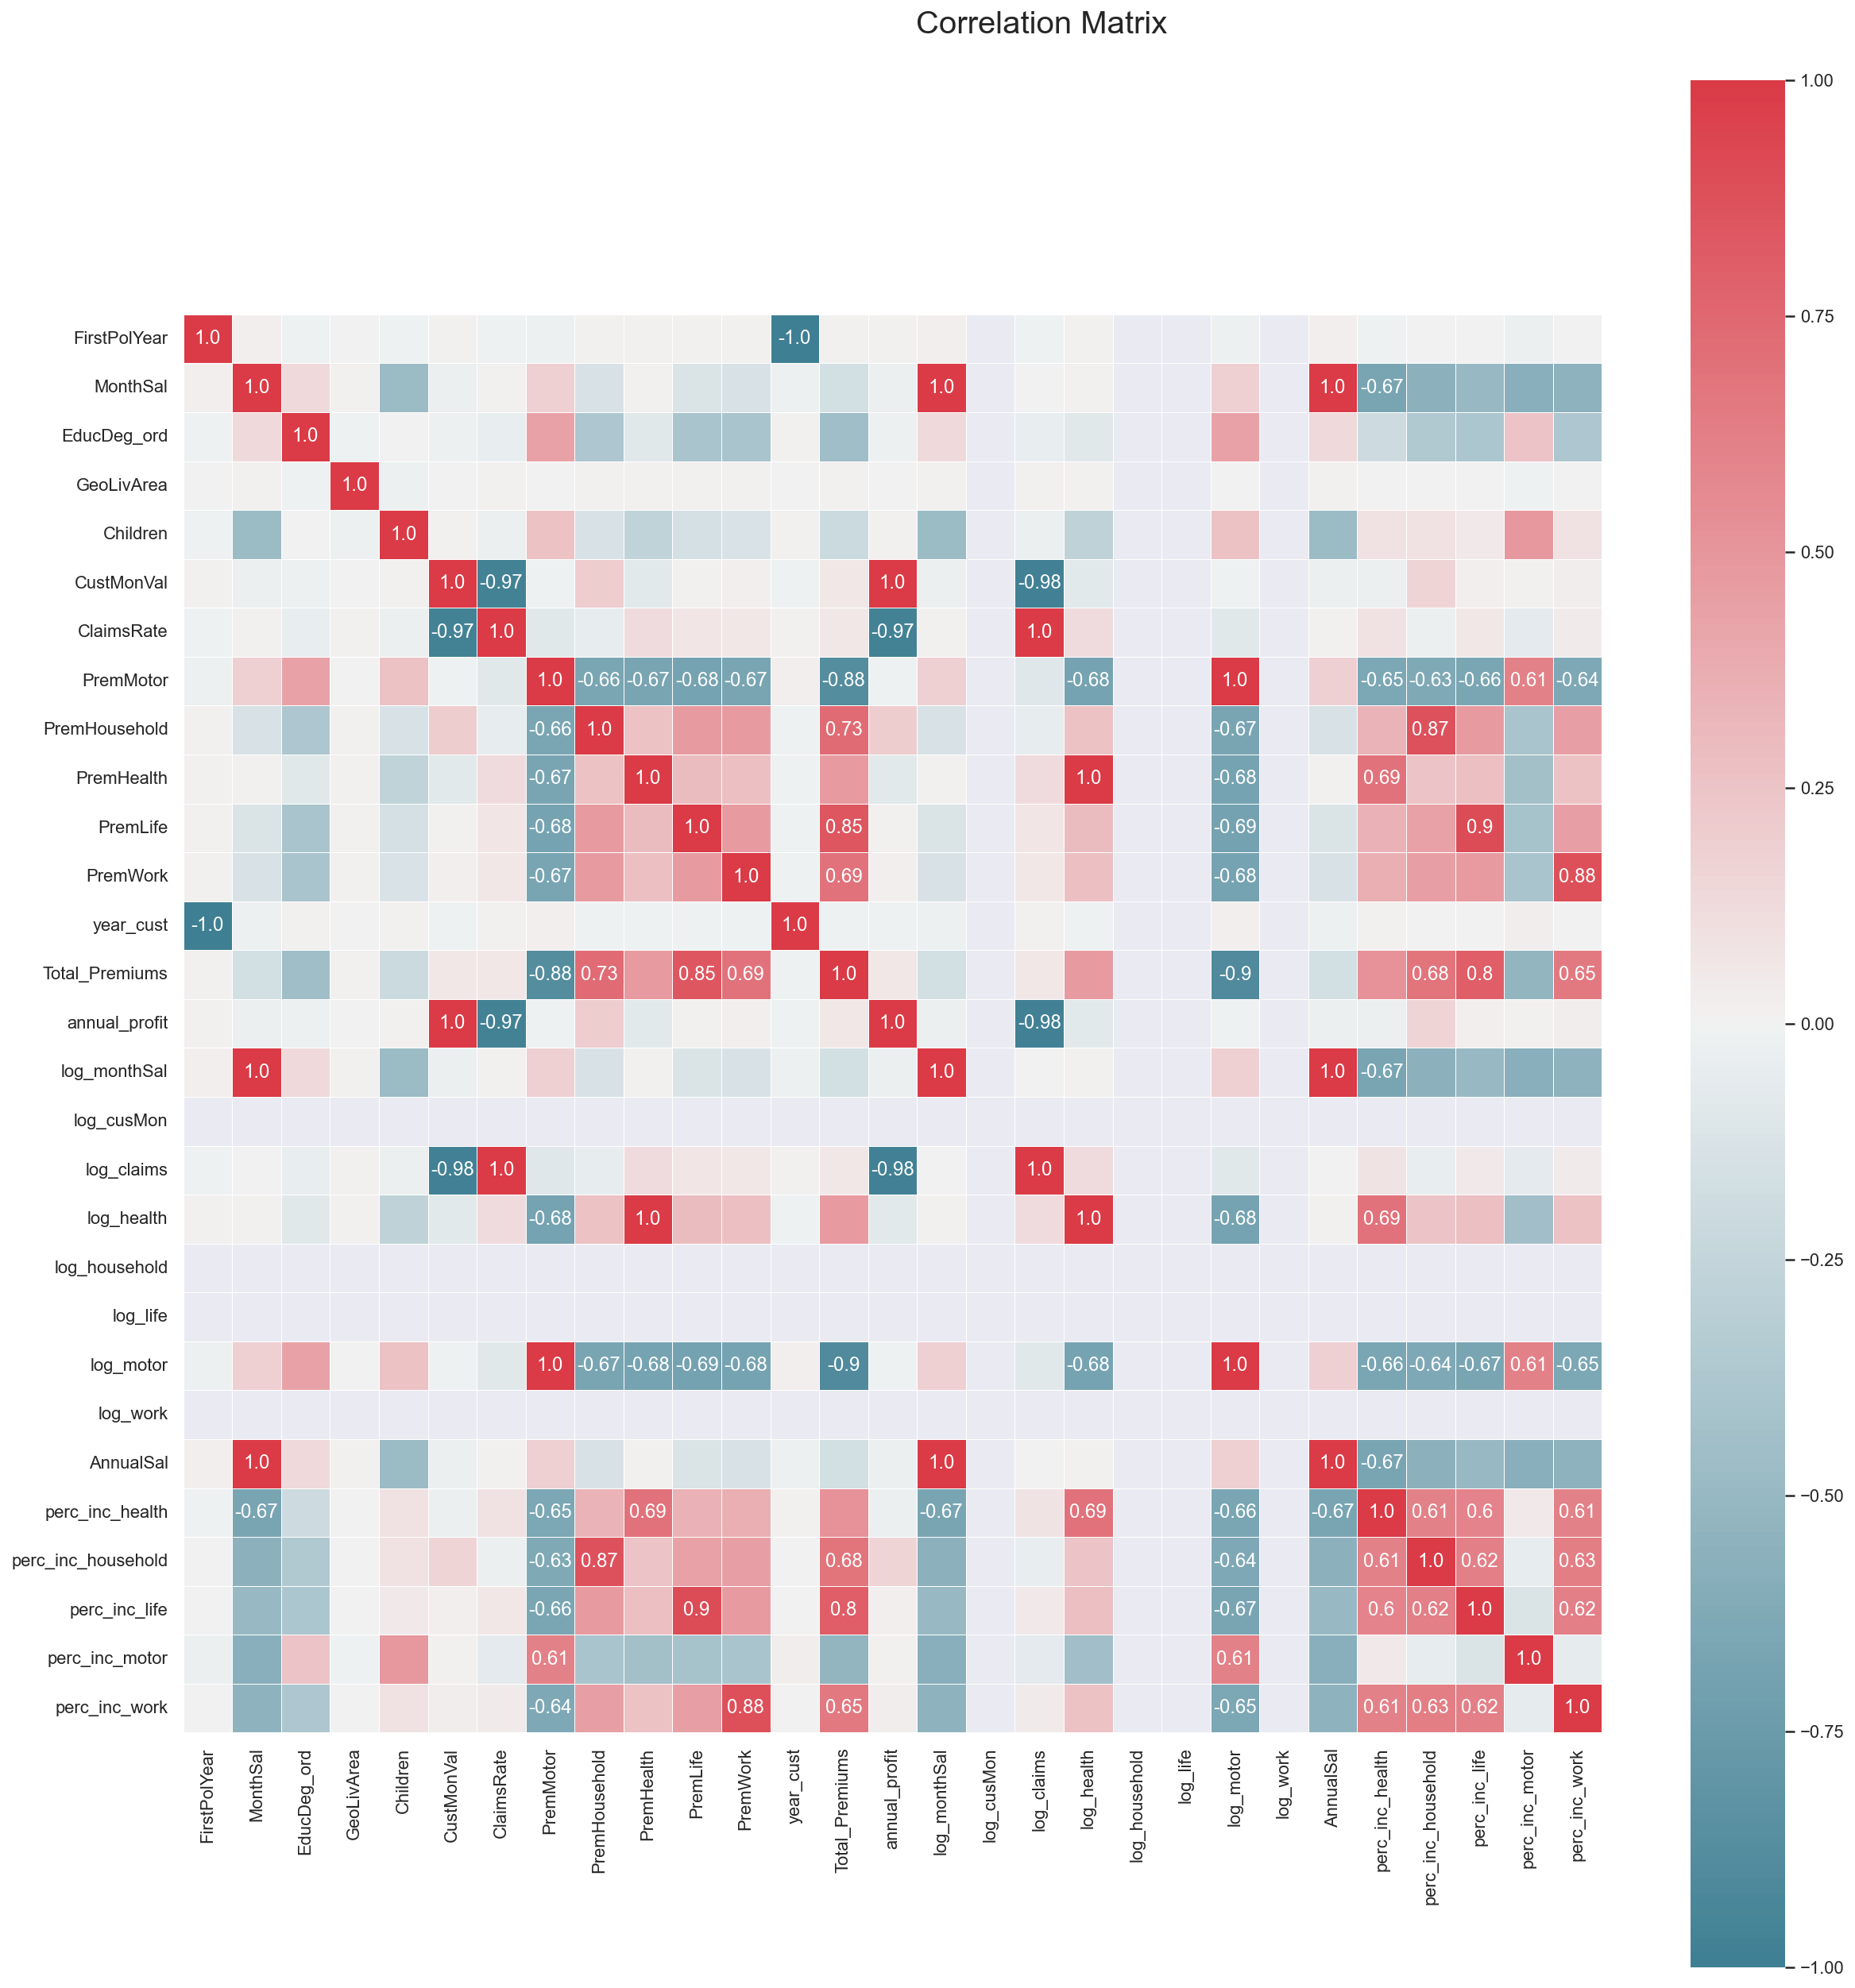

In [520]:
# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(data_out_miss.corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.6| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.6
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [102]:
IQR - HELENA
KNN: EDUC -- DANIEL
LOG: CHILDREN -- HELENA
ONE-HOT ENCODING: EducDeg_ord, GeoLivArea -- FILIPA
correlaçoes entre variaveis binarias e continuas -- FILIPA

SyntaxError: invalid syntax (Temp/ipykernel_29080/3963623193.py, line 4)

### One-hot Encoding

In [521]:
ohc_feat_list = ['EducDeg_ord', 'GeoLivArea']

In [522]:
data_ohc = data_out_miss.copy()

In [523]:
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse = False, drop = "first")
ohc_feat = ohc.fit_transform(data_ohc[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index = data_ohc.index, columns = ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

x0_1  x0_2  x0_3  x0_4  x1_2  x1_3  x1_4
CustID                                           
1.0       0.0   1.0   0.0   0.0   0.0   0.0   0.0
2.0       0.0   1.0   0.0   0.0   0.0   0.0   1.0
3.0       1.0   0.0   0.0   0.0   0.0   1.0   0.0
4.0       0.0   0.0   1.0   0.0   0.0   0.0   1.0
5.0       0.0   0.0   1.0   0.0   0.0   0.0   1.0
...       ...   ...   ...   ...   ...   ...   ...
8019.0    0.0   0.0   1.0   0.0   1.0   0.0   0.0
8375.0    1.0   0.0   0.0   0.0   1.0   0.0   0.0
8420.0    0.0   0.0   1.0   0.0   1.0   0.0   0.0
9325.0    0.0   1.0   0.0   0.0   1.0   0.0   0.0
10011.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0

[10120 rows x 7 columns]

In [524]:
ohc_df.rename(columns={'x0_1':'EducDeg_ord1','x0_2':'EducDeg_ord2','x0_3':'EducDeg_ord3','x0_4':'EducDeg_ord4', 'x1_2':'GeoLivArea_2', 'x1_3':'GeoLivArea_3', 'x1_4':'GeoLivArea_4'},inplace=True)

In [525]:
data_ohc = pd.concat([data_ohc.drop(columns = ohc_feat_list), ohc_df], axis=1)
data_ohc

FirstPolYear  MonthSal  Children  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                         
1.0          0.458333  0.393345         1    0.425969    0.240741   0.641146   
2.0          0.291667  0.073379         1    0.152510    0.691358   0.129713   
3.0          0.708333  0.414676         0    0.492025    0.172840   0.350285   
4.0          0.666667  0.163396         1    0.213460    0.611111   0.309715   
5.0          0.500000  0.305034         1    0.241345    0.555556   0.577334   
...               ...       ...       ...         ...         ...        ...   
8019.0       0.333333  0.504693         1    0.454640    0.098765   0.870287   
8375.0       0.791667  0.126067         1    0.091207    0.740741   0.096377   
8420.0       0.083333  0.544155         1    0.507206    0.049383   0.903812   
9325.0       0.833333  0.343217         1    0.418077    0.234568   0.521905   
10011.0      0.750000  0.773464         0    0.154053    0.703704   0.301711   

         PremHousehold  PremHealth  PremLife  PremWork  ...  perc_inc_life  \
CustID                                                  ...                  
1.0           0.097258    0.333663  0.261714  0.079112  ...       0.055446   
2.0           0.309310    0.266984  0.976305  0.323484  ...       1.108749   
3.0           0.188596    0.284716  0.452343  0.304014  ...       0.090903   
4.0           0.074525    0.704048  0.205165  0.110466  ...       0.104636   
5.0           0.077328    0.415084  0.124921  0.146366  ...       0.034128   
...                ...         ...       ...       ...  ...            ...   
8019.0        0.031139    0.168079  0.028541  0.013692  ...       0.004713   
8375.0        0.433173    0.432816  0.253089  0.513993  ...       0.167299   
8420.0        0.062970    0.117131  0.029074  0.046552  ...       0.004452   
9325.0        0.093416    0.505495  0.109851  0.064516  ...       0.026672   
10011.0       0.143793    0.704295  0.362407  0.129936  ...       0.039046   

         perc_inc_motor  perc_inc_work  EducDeg_ord1  EducDeg_ord2  \
CustID                                                               
1.0            0.135832       0.016760           0.0           1.0   
2.0            0.147310       0.367368           0.0           1.0   
3.0            0.070393       0.061095           1.0           0.0   
4.0            0.157957       0.056339           0.0           0.0   
5.0            0.157724       0.039986           0.0           0.0   
...                 ...            ...           ...           ...   
8019.0         0.143699       0.002261           0.0           0.0   
8375.0         0.063708       0.339763           1.0           0.0   
8420.0         0.138412       0.007129           0.0           0.0   
9325.0         0.126719       0.015665           0.0           1.0   
10011.0        0.032506       0.013999           0.0           1.0   

         EducDeg_ord3  EducDeg_ord4  GeoLivArea_2  GeoLivArea_3  GeoLivArea_4  
CustID                                                                         
1.0               0.0           0.0           0.0           0.0           0.0  
2.0               0.0           0.0           0.0           0.0           1.0  
3.0               0.0           0.0           0.0           1.0           0.0  
4.0               1.0           0.0           0.0           0.0           1.0  
5.0               1.0           0.0           0.0           0.0           1.0  
...               ...           ...           ...           ...           ...  
8019.0            1.0           0.0           1.0           0.0           0.0  
8375.0            0.0           0.0           1.0           0.0           0.0  
8420.0            1.0           0.0           1.0           0.0           0.0  
9325.0            0.0           0.0           1.0           0.0           0.0  
10011.0           0.0           0.0           1.0           0.0           0.0  

[

### Correlation between binary and continuous variables

In [526]:
data_corr = data_out_miss.copy()
data_corr

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0          0.458333  0.393345            2           1         1   
2.0          0.291667  0.073379            2           4         1   
3.0          0.708333  0.414676            1           3         0   
4.0          0.666667  0.163396            3           4         1   
5.0          0.500000  0.305034            3           4         1   
...               ...       ...          ...         ...       ...   
8019.0       0.333333  0.504693            3           2         1   
8375.0       0.791667  0.126067            1           2         1   
8420.0       0.083333  0.544155            3           2         1   
9325.0       0.833333  0.343217            2           2         1   
10011.0      0.750000  0.773464            2           2         0   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  ...  \
CustID                                                                 ...   
1.0        0.425969    0.240741   0.641146       0.097258    0.333663  ...   
2.0        0.152510    0.691358   0.129713       0.309310    0.266984  ...   
3.0        0.492025    0.172840   0.350285       0.188596    0.284716  ...   
4.0        0.213460    0.611111   0.309715       0.074525    0.704048  ...   
5.0        0.241345    0.555556   0.577334       0.077328    0.415084  ...   
...             ...         ...        ...            ...         ...  ...   
8019.0     0.454640    0.098765   0.870287       0.031139    0.168079  ...   
8375.0     0.091207    0.740741   0.096377       0.433173    0.432816  ...   
8420.0     0.507206    0.049383   0.903812       0.062970    0.117131  ...   
9325.0     0.418077    0.234568   0.521905       0.093416    0.505495  ...   
10011.0    0.154053    0.703704   0.301711       0.143793    0.704295  ...   

         log_household  log_life  log_motor  log_work  AnnualSal  \
CustID                                                             
1.0                NaN       NaN  -0.193043       NaN   4.720137   
2.0                NaN       NaN  -0.887015       NaN   0.880546   
3.0                NaN       NaN  -0.455579       NaN   4.976109   
4.0                NaN       NaN  -0.509038       NaN   1.960751   
5.0                NaN       NaN  -0.238573       NaN   3.660410   
...                ...       ...        ...       ...        ...   
8019.0             NaN       NaN  -0.060338       NaN   6.056314   
8375.0             NaN       NaN  -1.016028       NaN   1.512799   
8420.0             NaN       NaN  -0.043922       NaN   6.529863   
9325.0             NaN       NaN  -0.282409       NaN   4.118601   
10011.0            NaN       NaN  -0.520409       NaN   9.281570   

         perc_inc_health  perc_inc_household  perc_inc_life  perc_inc_motor  \
CustID                                                                        
1.0             0.070689            0.020605       0.055446        0.135832   
2.0             0.303203            0.351271       1.108749        0.147310   
3.0             0.057217            0.037900       0.090903        0.070393   
4.0             0.359070            0.038009       0.104636        0.157957   
5.0             0.113398            0.021125       0.034128        0.157724   
...                  ...                 ...            ...             ...   
8019.0          0.027753            0.005142       0.004713        0.143699   
8375.0          0.286103            0.286339       0.167299        0.063708   
8420.0          0.017938            0.009643       0.004452        0.138412   
9325.0          0.122735            0.022682       0.026672        0.126719   
10011.0         0.075881            0.015492       0.039046        0.032506   

         perc_inc_work  
CustID                  
1.0           0.016760  
2.0           0.367368  
3.0           0.061095  
4.0           0.056339  
5.0           0.0399

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GeoLivArea'] = data['GeoLivArea'].astype(object)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22384/3022521716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

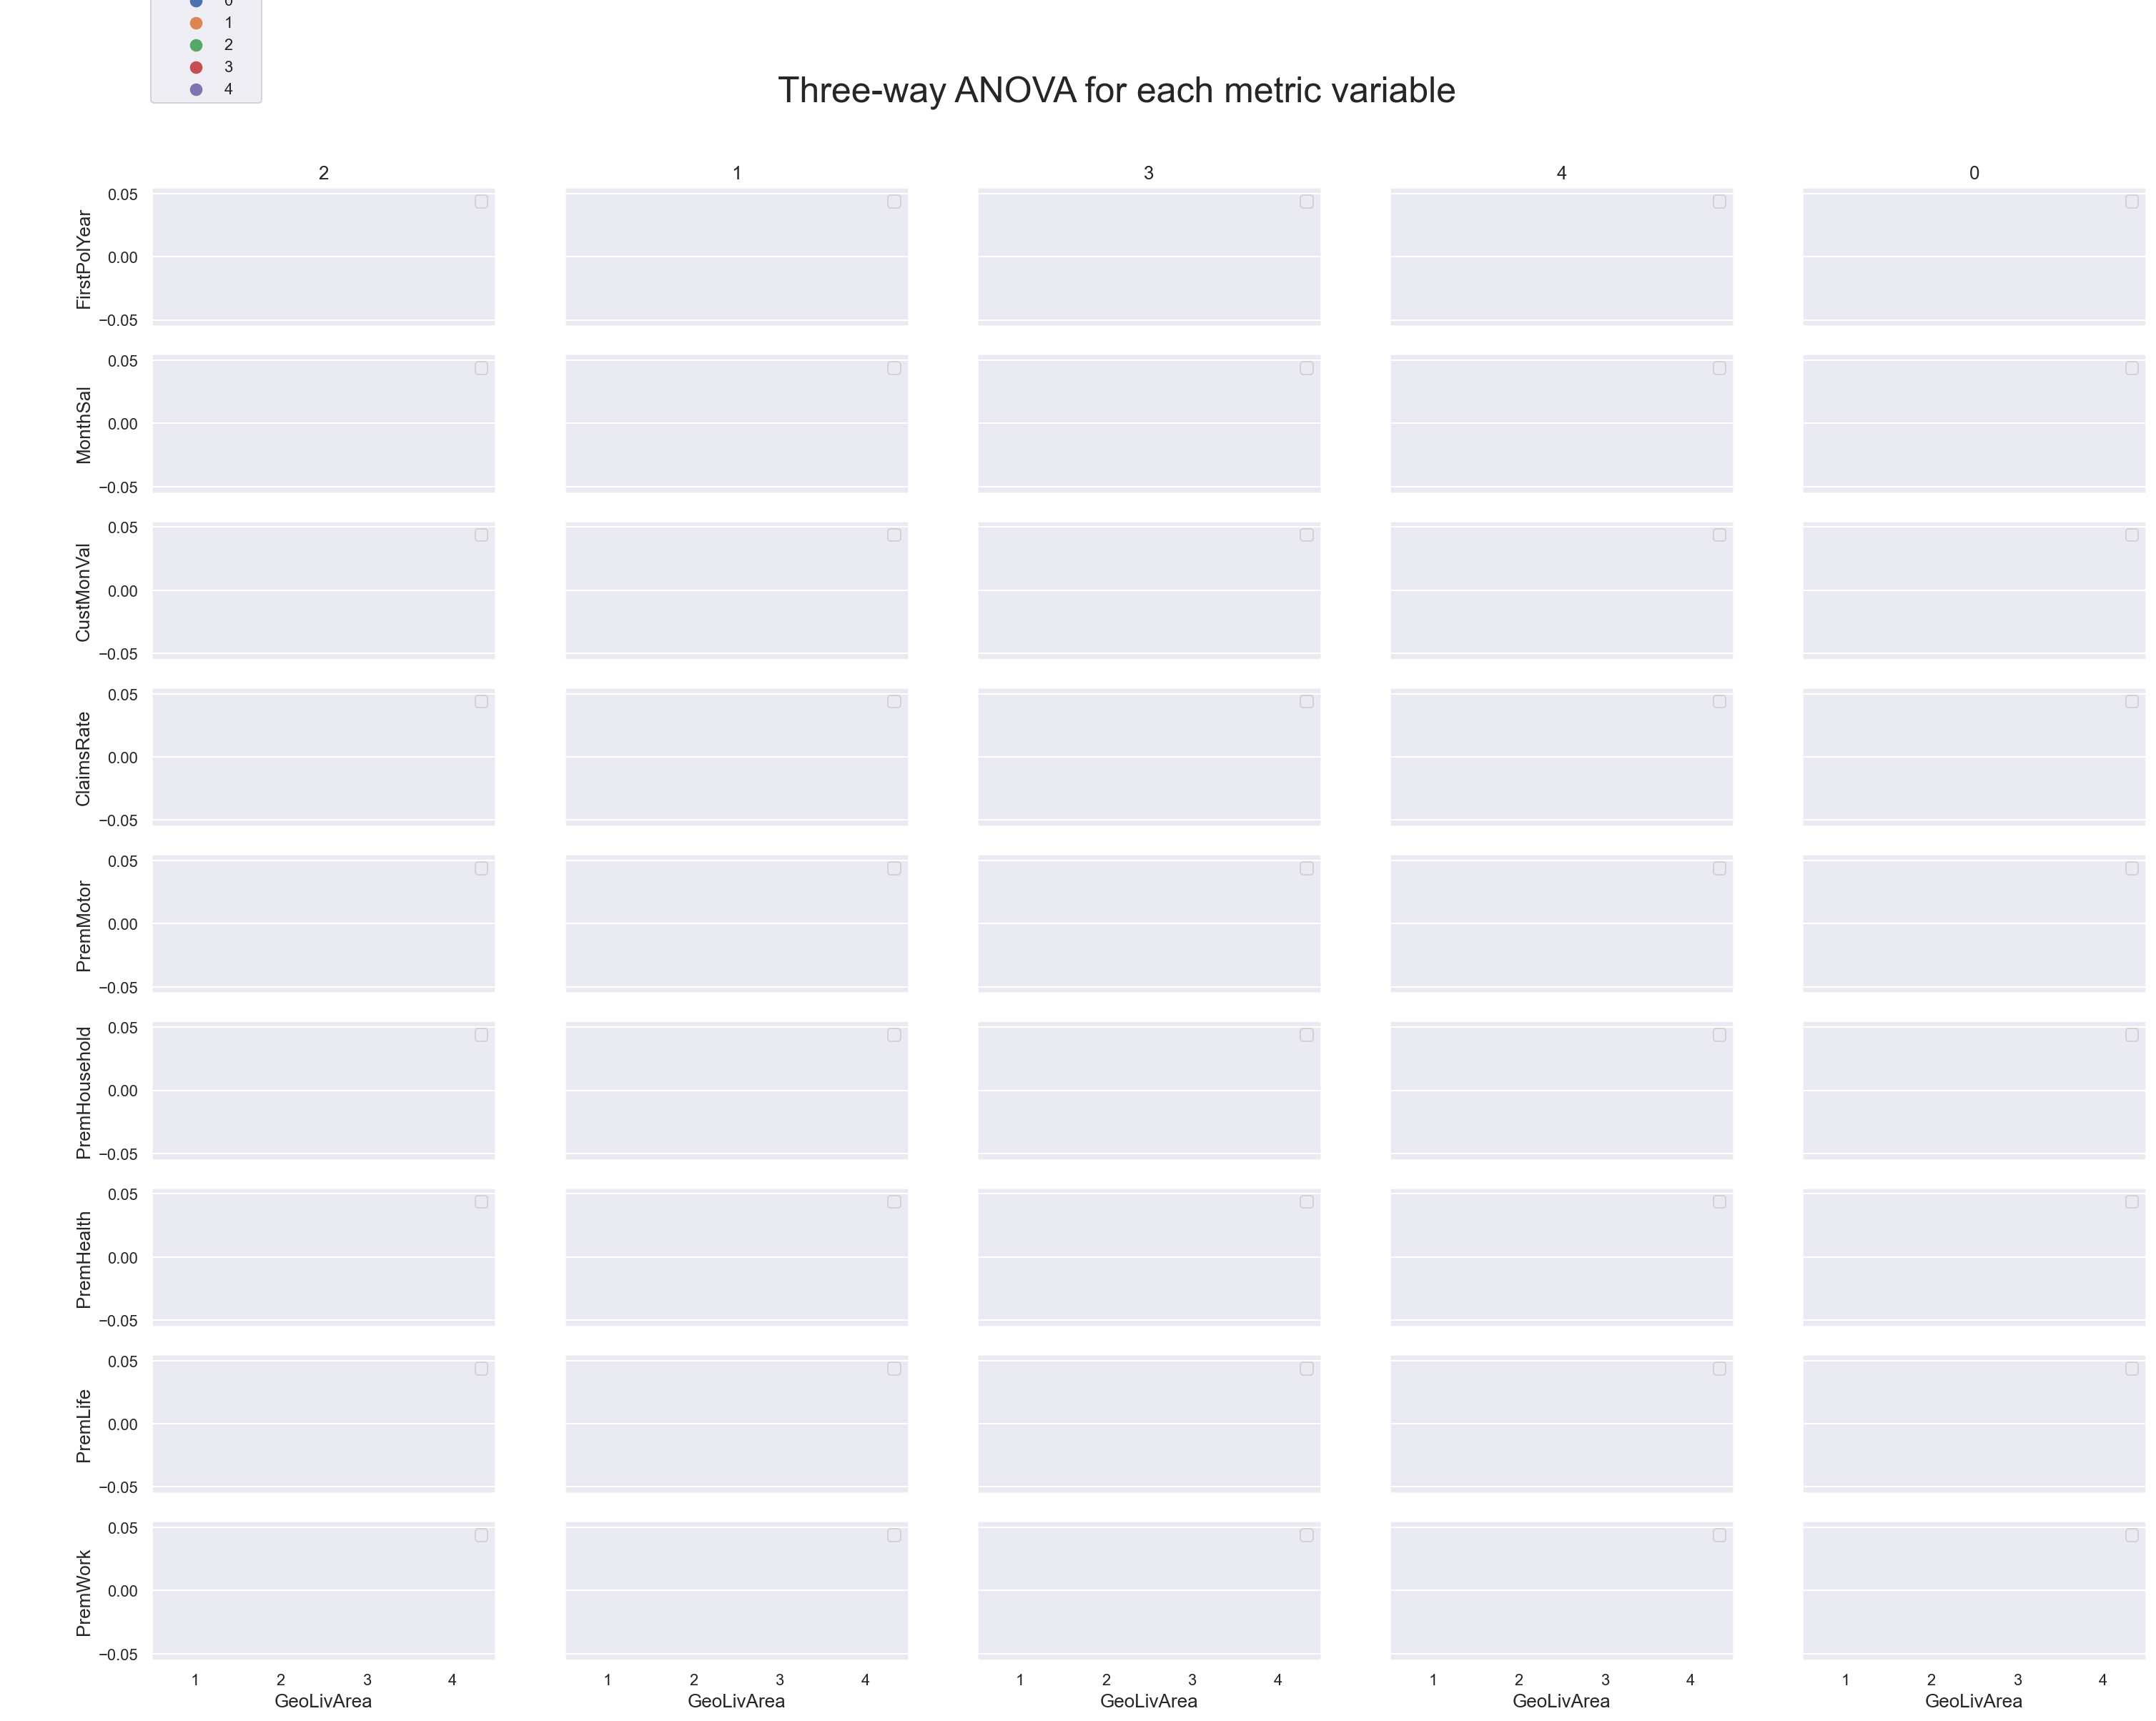

In [527]:
from itertools import product
# notice we drop missing values in order to not plot it as a distinct value
educ_vals = data_corr.EducDeg_ord.dropna().unique()
educ_vals = educ_vals

fig, axes = plt.subplots(len(metric_features), len(educ_vals), figsize=(25,18), sharex=True, sharey="row")

for ax, (feat, educ_deg) in zip(axes.flatten(), product(metric_features, educ_vals)):
    # get the data for each subplot
    data = data_corr[data_corr.EducDeg_ord == educ_deg]
    data['GeoLivArea'] = data['GeoLivArea'].astype(object)
    
    # we are distinguishing points according to the variable "dependents"
    sns.pointplot(x="GeoLivArea", y=feat, hue="EducDeg_ord", hue_order=["0", "1", "2", "3", "4"], data=data, capsize=.2,
             height=6, aspect=.75, ax=ax)
    
    # remove the typical default y and x labels and legend of each axis
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend('')

# set columns' titles (education)
for ax, label in zip(axes[0,:], educ_vals):
    ax.set_title(label, fontsize=13)

# set metric names
for ax, label in zip(axes[:,0], metric_features):
    ax.set_ylabel(label, fontsize=13)

# set x axis label (dependents)
for ax in axes[-1,:]:
    ax.set_xlabel('GeoLivArea', fontsize=13)

# Set legend (gender)
handles, _ = axes[0,0].get_legend_handles_labels()
fig.legend(handles, ["0", "1", "2", "3", "4"], loc=(0.07,0.94), title="GeoLivArea", title_fontsize=13)

# set figure
plt.subplots_adjust(top=0.92)
plt.suptitle("Three-way ANOVA for each metric variable", fontsize=25)

plt.show()